In [1]:
import os  
import pandas as pd  
from tqdm import tqdm
import gseapy as gp
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import os, re
import seaborn as sns
from scipy.stats import kstest
from scipy import stats
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 15)
sns.set(font_scale=1.5)
sns.set_style("white")

# all CHIPI

In [2]:
def read_txt_to_dict(file_path):
    result_dict = {}
    with open(file_path, 'r') as file:
        for line in file:
            elements = line.strip().split('\t')

            if len(elements) >= 2:
                key = elements[0]
                values = [elem for elem in elements[1:] if elem]
                result_dict[key] = values
    return result_dict

In [3]:
GO_CC_23=read_txt_to_dict('/home2/zhenglijing/work/GO/GO_Cellular_Component_2023.txt')
GO_BP_23=read_txt_to_dict('/home2/zhenglijing/work/GO/GO_Biological_Process_2023.txt')
GO_MF_23=read_txt_to_dict('/home2/zhenglijing/work/GO/GO_Molecular_Function_2023.txt')


In [4]:
OR=pd.read_csv('beforefilterp.csv',index_col=0)

In [6]:
OR

geneloci            OR             p  \
0            chr1-664468-664468-G-T-LOC100133331  4.500000e+00  2.442487e-06   
1             chr1-12940016-12940016-C-A-PRAMEF4  4.000000e+00  7.950952e-02   
2               chr1-16908275-16908275-T-G-NBPF1  2.500000e+00  1.214264e-01   
3               chr1-16918255-16918255-A-C-NBPF1  3.800000e+00  2.865394e-09   
4             chr1-16969246-16969246-G-A-CROCCP2  3.156250e+00  1.461844e-08   
...                                          ...           ...           ...   
1623      chr12-64216816-64216816-A-C-RXYLT1-AS1  5.250000e+00  2.369065e-03   
1624        chr17-21905071-21905071-T-G-FLJ36000  1.000000e+00  1.000000e+00   
1625         chr1-243289588-243289588-T-C-CEP170  6.696973e+12  9.999909e-01   
1626  chr14-106066660-106066660-C-T-LOC105370697  6.119515e+11  9.999609e-01   
1627     chr14-106066660-106066660-C-T-MIR8071-1  6.119515e+11  9.999609e-01   

           LCI        HCI  
0     2.407454   8.411375  
1     0.849427  18.836226  
2     0.784084   7.971089  
3     2.445964   5.903604  
4     2.120797   4.697250  
...        ...        ...  
1623  1.802149  15.294237  
1624  0.062549  15.987508  
1625  0.000000        inf  
1626  0.000000        inf  
1627  0.000000        inf  

[1628 rows x 5 columns]

In [7]:
[i.split('-')[0]+'-'+i.split('-')[1] for i in list(OR['geneloci'])]

['chr1-664468',
 'chr1-12940016',
 'chr1-16908275',
 'chr1-16918255',
 'chr1-16969246',
 'chr1-16969246',
 'chr1-16973606',
 'chr1-17012152',
 'chr1-17012152',
 'chr1-106435311',
 'chr1-106435311',
 'chr1-144816441',
 'chr1-144816441',
 'chr1-144816441',
 'chr1-144816441',
 'chr1-144816621',
 'chr1-144816621',
 'chr1-144994902',
 'chr1-145281780',
 'chr1-145282093',
 'chr1-145282093',
 'chr1-145282093',
 'chr1-146055434',
 'chr1-148008496',
 'chr1-148015877',
 'chr1-148021700',
 'chr1-148342791',
 'chr1-148903313',
 'chr1-148903313',
 'chr1-148903758',
 'chr1-148903758',
 'chr1-206567084',
 'chr2-109278823',
 'chr2-112616040',
 'chr3-10091252',
 'chr3-10106623',
 'chr3-75420469',
 'chr3-75420469',
 'chr3-125695585',
 'chr3-195378126',
 'chr4-39974888',
 'chr4-122997459',
 'chr4-122997459',
 'chr5-34193722',
 'chr6-57512352',
 'chr6-58778649',
 'chr6-58778649',
 'chr6-58778718',
 'chr6-58778718',
 'chr7-5959661',
 'chr7-72685759',
 'chr7-72685759',
 'chr7-76629626',
 'chr7-76796928',
 '

In [8]:
OR['loc']=[i.split('-')[0]+'-'+i.split('-')[1] for i in list(OR['geneloci'])]

In [9]:
OR=OR.drop_duplicates('loc')

In [10]:
OR.sort_values('OR')

geneloci            OR         p       LCI  \
408         chr6-348482-348482-T-C-DUSP22  8.333333e-02  0.016967  0.010836   
1443       chr5-796537-796537-C-T-ZDHHC11  9.090909e-02  0.021687  0.011737   
940      chr7-6836078-6836078-A-C-RSPH10B  2.000000e-01  0.141776  0.023366   
282      chr1-16894147-16894147-T-A-NBPF1  2.000000e-01  0.141776  0.023366   
1472    chr14-20137559-20137559-C-G-POTEM  2.500000e-01  0.214998  0.027943   
...                                   ...           ...       ...       ...   
838      chr6-116774503-116774503-T-C-DSE  8.371840e+15  0.999999  0.000000   
1195      chr2-96804363-96804363-T-C-ASTL  8.415666e+15  1.000000  0.000000   
598   chr15-23299924-23299924-C-T-HERC2P2  8.415666e+15  0.999999  0.000000   
1555  chr14-19889793-19889793-C-G-BMS1P22  8.415666e+15  1.000000  0.000000   
599   chr15-23299928-23299928-C-T-HERC2P2  8.415666e+15  0.999999  0.000000   

           HCI             loc  
408   0.640881     chr6-348482  
1443  0.704139     chr5-796537  
940   1.711885    chr7-6836078  
282   1.711885   chr1-16894147  
1472  2.236723  chr14-20137559  
...        ...             ...  
838        inf  chr6-116774503  
1195       inf   chr2-96804363  
598        inf  chr15-23299924  
1555       inf  chr14-19889793  
599        inf  chr15-23299928  

[1149 rows x 6 columns]

In [11]:
OR

geneloci            OR             p  \
0            chr1-664468-664468-G-T-LOC100133331  4.500000e+00  2.442487e-06   
1             chr1-12940016-12940016-C-A-PRAMEF4  4.000000e+00  7.950952e-02   
2               chr1-16908275-16908275-T-G-NBPF1  2.500000e+00  1.214264e-01   
3               chr1-16918255-16918255-A-C-NBPF1  3.800000e+00  2.865394e-09   
4             chr1-16969246-16969246-G-A-CROCCP2  3.156250e+00  1.461844e-08   
...                                          ...           ...           ...   
1621           chr7-66751582-66751582-A-G-PMS2P4  2.000000e+00  5.714262e-01   
1622        chr12-64216816-64216816-A-C-MIR10527  5.250000e+00  2.369065e-03   
1624        chr17-21905071-21905071-T-G-FLJ36000  1.000000e+00  1.000000e+00   
1625         chr1-243289588-243289588-T-C-CEP170  6.696973e+12  9.999909e-01   
1626  chr14-106066660-106066660-C-T-LOC105370697  6.119515e+11  9.999609e-01   

           LCI        HCI              loc  
0     2.407454   8.411375      chr1-664468  
1     0.849427  18.836226    chr1-12940016  
2     0.784084   7.971089    chr1-16908275  
3     2.445964   5.903604    chr1-16918255  
4     2.120797   4.697250    chr1-16969246  
...        ...        ...              ...  
1621  0.181353  22.056405    chr7-66751582  
1622  1.802149  15.294237   chr12-64216816  
1624  0.062549  15.987508   chr17-21905071  
1625  0.000000        inf   chr1-243289588  
1626  0.000000        inf  chr14-106066660  

[1149 rows x 6 columns]

In [12]:
OR=OR.reset_index()

In [13]:
OR['gene']=OR['geneloci'].str.split('-',expand=True)[5]

In [14]:
OR['logOR']=np.log2(OR['OR'])

In [15]:
orrnk=OR[['gene','logOR']].set_index('gene').sort_values('logOR',ascending=False)

In [16]:
orrnk

logOR
gene                
HERC2P2    52.901999
HERC2P2    52.901999
ASTL       52.901999
BMS1P22    52.901999
LOC390705  52.894466
...              ...
POTEM      -2.000000
RSPH10B    -2.321928
NBPF1      -2.321928
ZDHHC11    -3.459432
DUSP22     -3.584963

[1149 rows x 1 columns]

## GO

In [17]:
OR[OR['p']<0.05]

index                              geneloci         OR             p  \
0         0   chr1-664468-664468-G-T-LOC100133331   4.500000  2.442487e-06   
3         3      chr1-16918255-16918255-A-C-NBPF1   3.800000  2.865394e-09   
4         4    chr1-16969246-16969246-G-A-CROCCP2   3.156250  1.461844e-08   
5         6     chr1-16973606-16973606-G-T-MST1P2   2.608696  3.216005e-08   
9        15    chr1-144816621-144816621-A-G-NBPF8   2.282051  1.735099e-05   
...     ...                                   ...        ...           ...   
911    1294     chrY-16952347-16952347-T-C-NLGN4Y   8.000000  4.993548e-02   
1020   1443        chr5-796537-796537-C-T-ZDHHC11   0.090909  2.168675e-02   
1025   1450      chr1-152284377-152284377-G-A-FLG  16.000000  7.149353e-03   
1048   1483   chr2-90122224-90122224-G-A-MIR4436A   0.388889  3.397982e-02   
1145   1622  chr12-64216816-64216816-A-C-MIR10527   5.250000  2.369065e-03   

           LCI         HCI             loc          gene     logOR  
0     2.407454    8.411375     chr1-664468  LOC100133331  2.169925  
3     2.445964    5.903604   chr1-16918255         NBPF1  1.925999  
4     2.120797    4.697250   chr1-16969246       CROCCP2  1.658211  
5     1.857005    3.664661   chr1-16973606        MST1P2  1.383329  
9     1.566267    3.324948  chr1-144816621         NBPF8  1.190331  
...        ...         ...             ...           ...       ...  
911   1.000586   63.962519   chrY-16952347        NLGN4Y  3.000000  
1020  0.011737    0.704139     chr5-796537       ZDHHC11 -3.459432  
1025  2.121883  120.647534  chr1-152284377           FLG  4.000000  
1048  0.162431    0.931067   chr2-90122224      MIR4436A -1.362570  
1145  1.802149   15.294237  chr12-64216816      MIR10527  2.392317  

[203 rows x 9 columns]

In [18]:
gene_sets=[GO_BP_23,GO_CC_23,GO_MF_23]

enr = gp.enrich(gene_list=OR[(OR['p']<0.05)&(OR['OR']>1)]['gene'],
                             gene_sets=gene_sets,
                             outdir='/home2/zhenglijing/work_0511/GO/CHIP/',
                             cutoff=1 # test dataset, use lower value from range(0,1)
                            )

In [19]:
BP=pd.read_csv('/home2/zhenglijing/work_0511/GO/CHIP/gs_ind_0.human.enrichr.reports.txt',sep='\t')
BPf=BP[BP['P-value']<0.05
      ].sort_values('P-value')

In [20]:
BPls=BPf['Term'].tolist()

In [ ]:
"Negative Regulation Of CD4-positive, Alpha-Beta T Cell Proliferation (GO:2000562)",
'Negative Regulation Of Chemokine Production (GO:0032682)',
"Negative Regulation Of Type II Interferon Production (GO:0032689)"
'Negative Regulation Of Inflammatory Response (GO:0050728)',
'Negative Regulation Of Defense Response (GO:0031348)',
'Negative Regulation Of Cytokine Production (GO:0001818)',
'Negative Regulation Of Myeloid Leukocyte Mediated Immunity (GO:0002887)',
'Positive Regulation Of NIK/NF-kappaB Signaling (GO:1901224)',
'Positive Regulation Of Interleukin-1 Production (GO:0032732)',
'Positive Regulation Of Dendritic Cell Chemotaxis (GO:2000510)',
'Positive Regulation Of Monocyte Chemotactic Protein-1 Production (GO:0071639)',
"Stress-Activated MAPK Cascade (GO:0051403)",


In [21]:
BPls

['Negative Regulation Of CD4-positive, Alpha-Beta T Cell Proliferation (GO:2000562)',
 'Regulation Of CD4-positive, Alpha-Beta T Cell Proliferation (GO:2000561)',
 'Negative Regulation Of Alpha-Beta T Cell Proliferation (GO:0046642)',
 'Regulation Of Monocyte Chemotactic Protein-1 Production (GO:0071637)',
 'Negative Regulation Of CD4-positive, Alpha-Beta T Cell Activation (GO:2000515)',
 'Negative Regulation Of Chemokine Production (GO:0032682)',
 'Positive Regulation Of Viral Life Cycle (GO:1903902)',
 'Regulation Of NIK/NF-kappaB Signaling (GO:1901222)',
 'Negative Regulation Of Type II Interferon Production (GO:0032689)',
 'Positive Regulation Of Gene Expression (GO:0010628)',
 'Response To Calcium Ion (GO:0051592)',
 'Positive Regulation Of Notch Signaling Pathway (GO:0045747)',
 'Regulation Of mRNA Processing (GO:0050684)',
 'Negative Regulation Of Inflammatory Response (GO:0050728)',
 'Negative Regulation Of Defense Response (GO:0031348)',
 'Regulation Of Mitotic Cell Cycle (GO:

In [22]:
CC=pd.read_csv('/home2/zhenglijing/work_0511/GO/CHIP/gs_ind_1.human.enrichr.reports.txt',sep='\t')
CCf=CC[CC['P-value']<0.05].sort_values('P-value')
CCls=CCf['Term'].tolist()
CCls

['Endocytic Vesicle Lumen (GO:0071682)',
 'Golgi Cis Cisterna (GO:0000137)',
 'Golgi Cisterna Membrane (GO:0032580)',
 'Golgi Cisterna (GO:0031985)',
 'cis-Golgi Network (GO:0005801)',
 'Asymmetric, Glutamatergic, Excitatory Synapse (GO:0098985)',
 'Symmetric Synapse (GO:0032280)',
 'Condensed Chromosome (GO:0000793)',
 'Inhibitory Synapse (GO:0060077)',
 'Intracellular Vesicle (GO:0097708)',
 'MLL3/4 Complex (GO:0044666)']

In [90]:
CCf

Gene_set                                               Term Overlap  \
16  gs_ind_1               Endocytic Vesicle Lumen (GO:0071682)    2/19   
23  gs_ind_1                    Golgi Cis Cisterna (GO:0000137)    2/26   
25  gs_ind_1               Golgi Cisterna Membrane (GO:0032580)    2/27   
24  gs_ind_1                        Golgi Cisterna (GO:0031985)    2/46   
51  gs_ind_1                     cis-Golgi Network (GO:0005801)    2/58   
2   gs_ind_1  Asymmetric, Glutamatergic, Excitatory Synapse ...     1/5   
47  gs_ind_1                     Symmetric Synapse (GO:0032280)     1/5   
9   gs_ind_1                  Condensed Chromosome (GO:0000793)    2/59   
29  gs_ind_1                    Inhibitory Synapse (GO:0060077)     1/8   
33  gs_ind_1                 Intracellular Vesicle (GO:0097708)    1/11   
34  gs_ind_1                        MLL3/4 Complex (GO:0044666)    1/11   

     P-value  Adjusted P-value  Odds Ratio  Combined Score             Genes  
16  0.001869          0.066610    43.09720       270.75170           SAA1;HP  
23  0.003499          0.066610    30.76899       174.01030  GOLGA8A;GOLGA8CP  
25  0.003770          0.066610    29.56034       164.96400  GOLGA8A;GOLGA8CP  
24  0.010670          0.113630    16.91706        76.80880  GOLGA8A;GOLGA8CP  
51  0.016606          0.113630    13.31311        54.55699  GOLGA8A;GOLGA8CP  
2   0.016896          0.113630    98.61616       402.42040            NLGN4Y  
47  0.016896          0.113630    98.61616       402.42040            NLGN4Y  
9   0.017152          0.113630    13.08068        53.18155        TTN;FANCD2  
29  0.026899          0.158406    59.15758       213.89390            NLGN4Y  
33  0.036802          0.177320    42.24675       139.50700            ABCA13  
34  0.036802          0.177320    42.24675       139.50700             KMT2C

In [23]:
MF=pd.read_csv('/home2/zhenglijing/work_0511/GO/CHIP/gs_ind_2.human.enrichr.reports.txt',sep='\t')
MFf=MF[MF['P-value']<0.05].sort_values('P-value')
MFls=MFf['Term'].tolist()
MFls

['Cyclin-Dependent Protein Kinase Activity (GO:0097472)',
 'Cyclin-Dependent Protein Serine/Threonine Kinase Activity (GO:0004693)',
 'Endopeptidase Activity (GO:0004175)',
 'Telethonin Binding (GO:0031433)',
 'Carbonyl Reductase (NADPH) Activity (GO:0004090)',
 'Protein Kinase Binding (GO:0019901)',
 'Protein Tyrosine Kinase Binding (GO:1990782)',
 'G-quadruplex DNA Binding (GO:0051880)',
 'Voltage-Gated Chloride Channel Activity (GO:0005247)',
 'Store-Operated Calcium Channel Activity (GO:0015279)',
 'Inositol 1,4,5 Trisphosphate Binding (GO:0070679)',
 'Neurexin Family Protein Binding (GO:0042043)',
 'Olfactory Receptor Activity (GO:0004984)',
 'DNA Replication Origin Binding (GO:0003688)',
 'Histone H3K4 Methyltransferase Activity (GO:0042800)',
 'Protein Tyrosine Kinase Activity (GO:0004713)',
 'Muscle Alpha-Actinin Binding (GO:0051371)',
 'MAP Kinase Kinase Activity (GO:0004708)',
 'Voltage-Gated Monoatomic Anion Channel Activity (GO:0008308)']

In [63]:
BPchoose=["Negative Regulation Of CD4-positive, Alpha-Beta T Cell Proliferation (GO:2000562)",
'Negative Regulation Of Chemokine Production (GO:0032682)',
"Negative Regulation Of Type II Interferon Production (GO:0032689)",
'Negative Regulation Of Inflammatory Response (GO:0050728)',
'Negative Regulation Of Defense Response (GO:0031348)',
'Negative Regulation Of Cytokine Production (GO:0001818)',
'Negative Regulation Of Myeloid Leukocyte Mediated Immunity (GO:0002887)',
'Positive Regulation Of NIK/NF-kappaB Signaling (GO:1901224)',
'Positive Regulation Of Interleukin-1 Production (GO:0032732)',
'Positive Regulation Of Dendritic Cell Chemotaxis (GO:2000510)',
'Positive Regulation Of Monocyte Chemotactic Protein-1 Production (GO:0071639)',
"Stress-Activated MAPK Cascade (GO:0051403)",
]
CCMFchoose=[
           'Carbonyl Reductase (NADPH) Activity (GO:0004090)',
           'Inositol 1,4,5 Trisphosphate Binding (GO:0070679)',
           'Cyclin-Dependent Protein Serine/Threonine Kinase Activity (GO:0004693)']

In [65]:
BP[BP['Term'].isin(BPchoose)].shape

(12, 8)

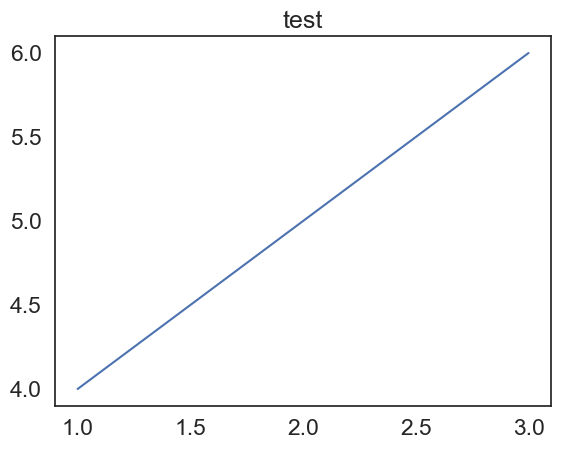

In [27]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font_path = '/home2/zhenglijing/work/Arial.ttf'font = FontProperties(fname=font_path)

plt.plot([1, 2, 3], [4, 5, 6])
plt.title('test', fontproperties=font)
plt.show()

In [28]:
plot['Overlap']

NameError: name 'plot' is not defined

In [66]:
def fraction_to_float(fraction_str):
    try:
        numerator, denominator = map(float, fraction_str.split('/'))
        return numerator / denominator
    except:
        return float(fraction_str)
plot['Overlap_float'] = plot['Overlap'].apply(fraction_to_float)

NameError: name 'plot' is not defined

In [97]:
plot

NameError: name 'plot' is not defined

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCop

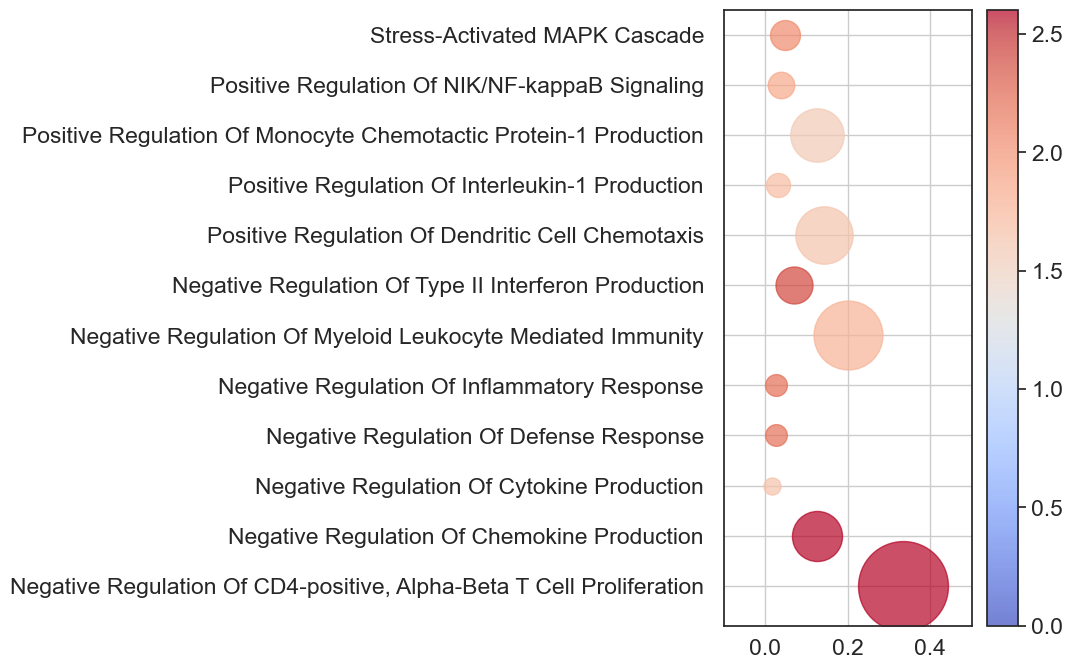

In [67]:
plt.rcParams['font.family'] = 'Arial'
plotBP=BP[BP['Term'].isin(BPchoose)]
plotBP['label']=plotBP['Term'].str.split('(',expand=True)[0]
plotBP['logP']=-np.log10(plotBP['P-value'])
plotBP['Overlap_float'] = plotBP['Overlap'].apply(fraction_to_float)
vmax=-np.log10(0.05)*2
plt.figure(figsize=(4,8))
for i,index in enumerate(plotBP.index):
            plt.scatter(plotBP.loc[index,'Overlap_float'],i, c=plotBP.loc[index,'logP'], s=plotBP.loc[index,'Odds Ratio'].astype(float)*25, alpha=0.7,
                            cmap='coolwarm',vmin=0,vmax=vmax)

plt.yticks(range(len(plotBP)),plotBP['label'])
plt.xlabel('')  
plt.ylabel('')  
plt.title('')  
plt.ylim(-0.8,len(plotBP)-0.5)
plt.xlim(-0.1,0.5)
plt.grid(True)  
plt.colorbar()
plt.tight_layout()
plt.show()

In [99]:
CC[BP['Term'].isin(BPchoose)]

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Empty DataFrame
Columns: [Gene_set, Term, Overlap, P-value, Adjusted P-value, Odds Ratio, Combined Score, Genes]
Index: []

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCop

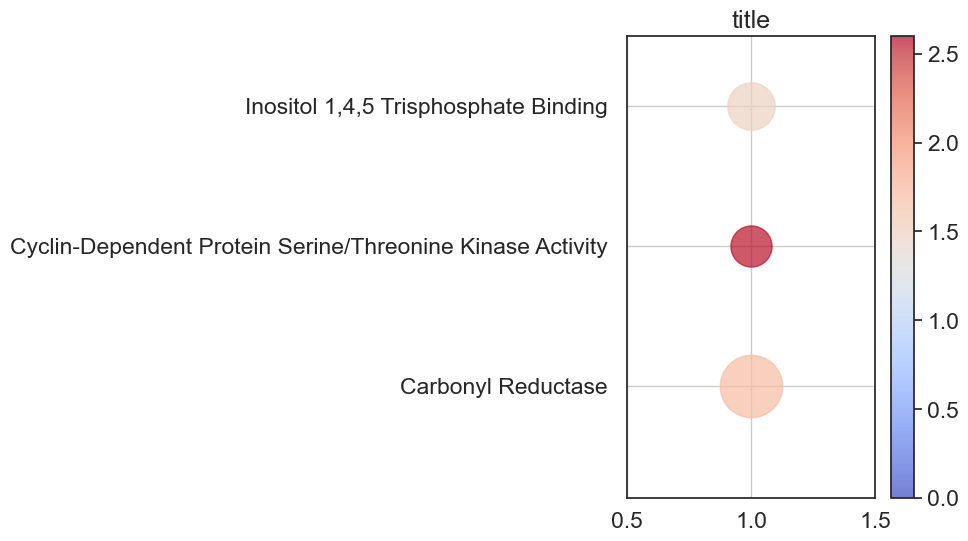

In [68]:
plt.rcParams['font.family'] = 'Arial'
plotMF=MF[MF['Term'].isin(CCMFchoose)]
plotMF['label']=plotMF['Term'].str.split('(',expand=True)[0]
plotMF['logP']=-np.log10(plotMF['P-value'])
plotMF['Overlap_float'] = plotMF['Overlap'].apply(fraction_to_float)

vmax=-np.log10(0.05)*2
plt.figure(figsize=(4,6))

for i,index in enumerate(plotMF.index):
            plt.scatter(1,i, c=plotMF.loc[index,'logP'], s=plotMF.loc[index,'Odds Ratio'].astype(float)*25, alpha=0.7,
                            cmap='coolwarm',vmin=0,vmax=vmax)

plt.yticks(range(len(plotMF)),plotMF['label'])
plt.xlabel('')  
plt.ylabel('')  
plt.title('')  
plt.xlim(0.5,1.5)
plt.ylim(-0.8,len(plotMF)-0.5)
plt.grid(True)  
plt.colorbar()
plt.title('title')
plt.tight_layout()
plt.show()

In [36]:
CCf[CCf['Term'].isin(CCMFchoose)]

Empty DataFrame
Columns: [Gene_set, Term, Overlap, P-value, Adjusted P-value, Odds Ratio, Combined Score, Genes]
Index: []

In [35]:
plotCC

Empty DataFrame
Columns: [Gene_set, Term, Overlap, P-value, Adjusted P-value, Odds Ratio, Combined Score, Genes]
Index: []

In [69]:
plt.rcParams['font.family'] = 'Arial'
plotCC=CCf[CCf['Term'].isin(CCMFchoose)]
plotCC['label']=plotCC['Term'].str.split('(',expand=True)[0]
plotCC['logP']=-np.log10(plotCC['P-value'])
plotCC['Overlap_float'] = plotCC['Overlap'].apply(fraction_to_float)
vmax=-np.log10(0.05)*2
plt.figure(figsize=(4,3))

for i,index in enumerate(plotCC.index):
            plt.scatter(1,i, c=plotCC.loc[index,'logP'], s=plotCC.loc[index,'Odds Ratio'].astype(float)*25, alpha=0.7,
                            cmap='coolwarm',vmin=0,vmax=vmax)

plt.yticks(range(len(plotCC)),plotCC['label'])
plt.xlabel('')  
plt.ylabel('')  
plt.title('')  
plt.xlim(0.5,1.5)
plt.ylim(-0.8,len(plotCC)-0.5)
plt.grid(True)  
plt.colorbar()
plt.title('title')
plt.tight_layout()
plt.show()

KeyError: 0

In [57]:
plotBP.shape

(10, 11)

In [55]:
plotMF

Gene_set                                               Term Overlap  \
10  gs_ind_2   Carbonyl Reductase (NADPH) Activity (GO:0004090)     1/6   
13  gs_ind_2  Cyclin-Dependent Protein Serine/Threonine Kina...    2/23   
33  gs_ind_2  Inositol 1,4,5 Trisphosphate Binding (GO:0070679)    1/10   

     P-value  Adjusted P-value  Odds Ratio  Combined Score          Genes  \
10  0.020242          0.200305    80.68044        314.6551        DHRS4L1   
13  0.002741          0.105151    35.06953        206.8859  CDK11B;CDK11A   
33  0.033512          0.200305    46.69697        158.5756          TRPC3   

                                                label      logP  Overlap_float  
10                                Carbonyl Reductase   1.693756       0.166667  
13  Cyclin-Dependent Protein Serine/Threonine Kina...  2.562036       0.086957  
33              Inositol 1,4,5 Trisphosphate Binding   1.474796       0.100000

In [77]:
plot_BPCCMF=pd.concat([plotBP,plotCC,plotMF]).reset_index()
plot_BPCCMF

index  Gene_set                                               Term  \
0     137  gs_ind_0  Negative Regulation Of CD4-positive, Alpha-Bet...   
1     147  gs_ind_0  Negative Regulation Of Chemokine Production (G...   
2     148  gs_ind_0  Negative Regulation Of Cytokine Production (GO...   
3     152  gs_ind_0  Negative Regulation Of Defense Response (GO:00...   
4     161  gs_ind_0  Negative Regulation Of Inflammatory Response (...   
5     168  gs_ind_0  Negative Regulation Of Myeloid Leukocyte Media...   
6     187  gs_ind_0  Negative Regulation Of Type II Interferon Prod...   
7     236  gs_ind_0  Positive Regulation Of Dendritic Cell Chemotax...   
8     251  gs_ind_0  Positive Regulation Of Interleukin-1 Productio...   
9     265  gs_ind_0  Positive Regulation Of Monocyte Chemotactic Pr...   
10    269  gs_ind_0  Positive Regulation Of NIK/NF-kappaB Signaling...   
11    442  gs_ind_0         Stress-Activated MAPK Cascade (GO:0051403)   
12     10  gs_ind_2   Carbonyl Reductase (NADPH) Activity (GO:0004090)   
13     13  gs_ind_2  Cyclin-Dependent Protein Serine/Threonine Kina...   
14     33  gs_ind_2  Inositol 1,4,5 Trisphosphate Binding (GO:0070679)   

   Overlap   P-value  Adjusted P-value  Odds Ratio  Combined Score  \
0      2/6  0.000169          0.057132  167.749100      1457.35200   
1     2/16  0.001320          0.102752   52.024530       344.92280   
2    3/178  0.022581          0.185952    6.076743        23.03476   
3    3/112  0.006509          0.185952    9.783850        49.25797   
4    3/111  0.006349          0.185952    9.874703        49.96006   
5      1/5  0.016896          0.185952   98.616160       402.42040   
6     2/28  0.004052          0.185952   28.442910       156.68190   
7      1/7  0.023576          0.185952   68.263400       255.81920   
8     2/64  0.019993          0.185952   12.030100        47.06623   
9      1/8  0.026899          0.185952   59.157580       213.89390   
10    2/53  0.013993          0.185952   14.610650        62.37549   
11    2/42  0.008953          0.185952   18.592970        87.67963   
12     1/6  0.020242          0.200305   80.680440       314.65510   
13    2/23  0.002741          0.105151   35.069530       206.88590   
14    1/10  0.033512          0.200305   46.696970       158.57560   

                     Genes                                              label  \
0           LGALS9C;LGALS9  Negative Regulation Of CD4-positive, Alpha-Bet...   
1           C1QTNF3;LGALS9       Negative Regulation Of Chemokine Production    
2   C1QTNF3;LGALS9C;LGALS9        Negative Regulation Of Cytokine Production    
3       TYRO3;C1QTNF3;SAA1           Negative Regulation Of Defense Response    
4       TYRO3;C1QTNF3;SAA1      Negative Regulation Of Inflammatory Response    
5                   LGALS9  Negative Regulation Of Myeloid Leukocyte Media...   
6           LGALS9C;LGALS9  Negative Regulation Of Type II Interferon Prod...   
7                   LGALS9  Positive Regulation Of Dendritic Cell Chemotaxis    
8              SAA1;LGALS9   Positive Regulation Of Interleukin-1 Production    
9                   LGALS9  Positive Regulation Of Monocyte Chemotactic Pr...   
10            LIMS1;LGALS9    Positive Regulation Of NIK/NF-kappaB Signaling    
11           MAP2K3;LGALS9                     Stress-Activated MAPK Cascade    
12                 DHRS4L1                                Carbonyl Reductase    
13           CDK11B;CDK11A  Cyclin-Dependent Protein Serine/Threonine Kina...   
14                   TRPC3              Inositol 1,4,5 Trisphosphate Binding    

        logP  Overlap_float  
0   3.773015       0.333333  
1   2.879374       0.125000  
2   1.646255       0.016854  
3   2.186508       0.026786  
4   2.197269       0.027027  
5   1.772214       0.200000  
6   2.392374       0.071429  
7   1.627532       0.142857  
8   1.699121       0.031250  
9   1.570263       0.125000  
10  1.854081       0.037736  
11  2.048020       0.047619  
12  1.69375

In [78]:
list(plot_BPCCMF['label'])

['Negative Regulation Of CD4-positive, Alpha-Beta T Cell Proliferation ',
 'Negative Regulation Of Chemokine Production ',
 'Negative Regulation Of Cytokine Production ',
 'Negative Regulation Of Defense Response ',
 'Negative Regulation Of Inflammatory Response ',
 'Negative Regulation Of Myeloid Leukocyte Mediated Immunity ',
 'Negative Regulation Of Type II Interferon Production ',
 'Positive Regulation Of Dendritic Cell Chemotaxis ',
 'Positive Regulation Of Interleukin-1 Production ',
 'Positive Regulation Of Monocyte Chemotactic Protein-1 Production ',
 'Positive Regulation Of NIK/NF-kappaB Signaling ',
 'Stress-Activated MAPK Cascade ',
 'Carbonyl Reductase ',
 'Cyclin-Dependent Protein Serine/Threonine Kinase Activity ',
 'Inositol 1,4,5 Trisphosphate Binding ']

In [146]:
listyticks=["Negative Regulation Of CD4-positive, \nAlpha-Beta T Cell Proliferation",
'Negative Regulation Of Chemokine\n Production',
"Negative Regulation Of Type II \nInterferon Production",
'Negative Regulation Of Inflammatory\n Response',
'Negative Regulation Of Defense \nResponse',
'Negative Regulation Of Cytokine\n Production',
'Negative Regulation Of Myeloid \nLeukocyte Mediated I mmunity',
'Positive Regulation Of NIK/NF-kappaB \nSignaling',
'Positive Regulation Of Interleukin-1 \nProduction',
'Positive Regulation Of Dendritic Cell \nChemotaxis',
'Positive Regulation Of Monocyte Chemotactic \nProtein-1 Production',
"Stress-Activated MAPK \nCascade",
 'Carbonyl Reductase \n(NADPH) Activity',
 'Inositol 1,4,5 Trisphosphate\n Binding',
'Cyclin-Dependent Protein Serine/\nThreonine Kinase Activity']

In [80]:
len(plot_BPCCMF)

15

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


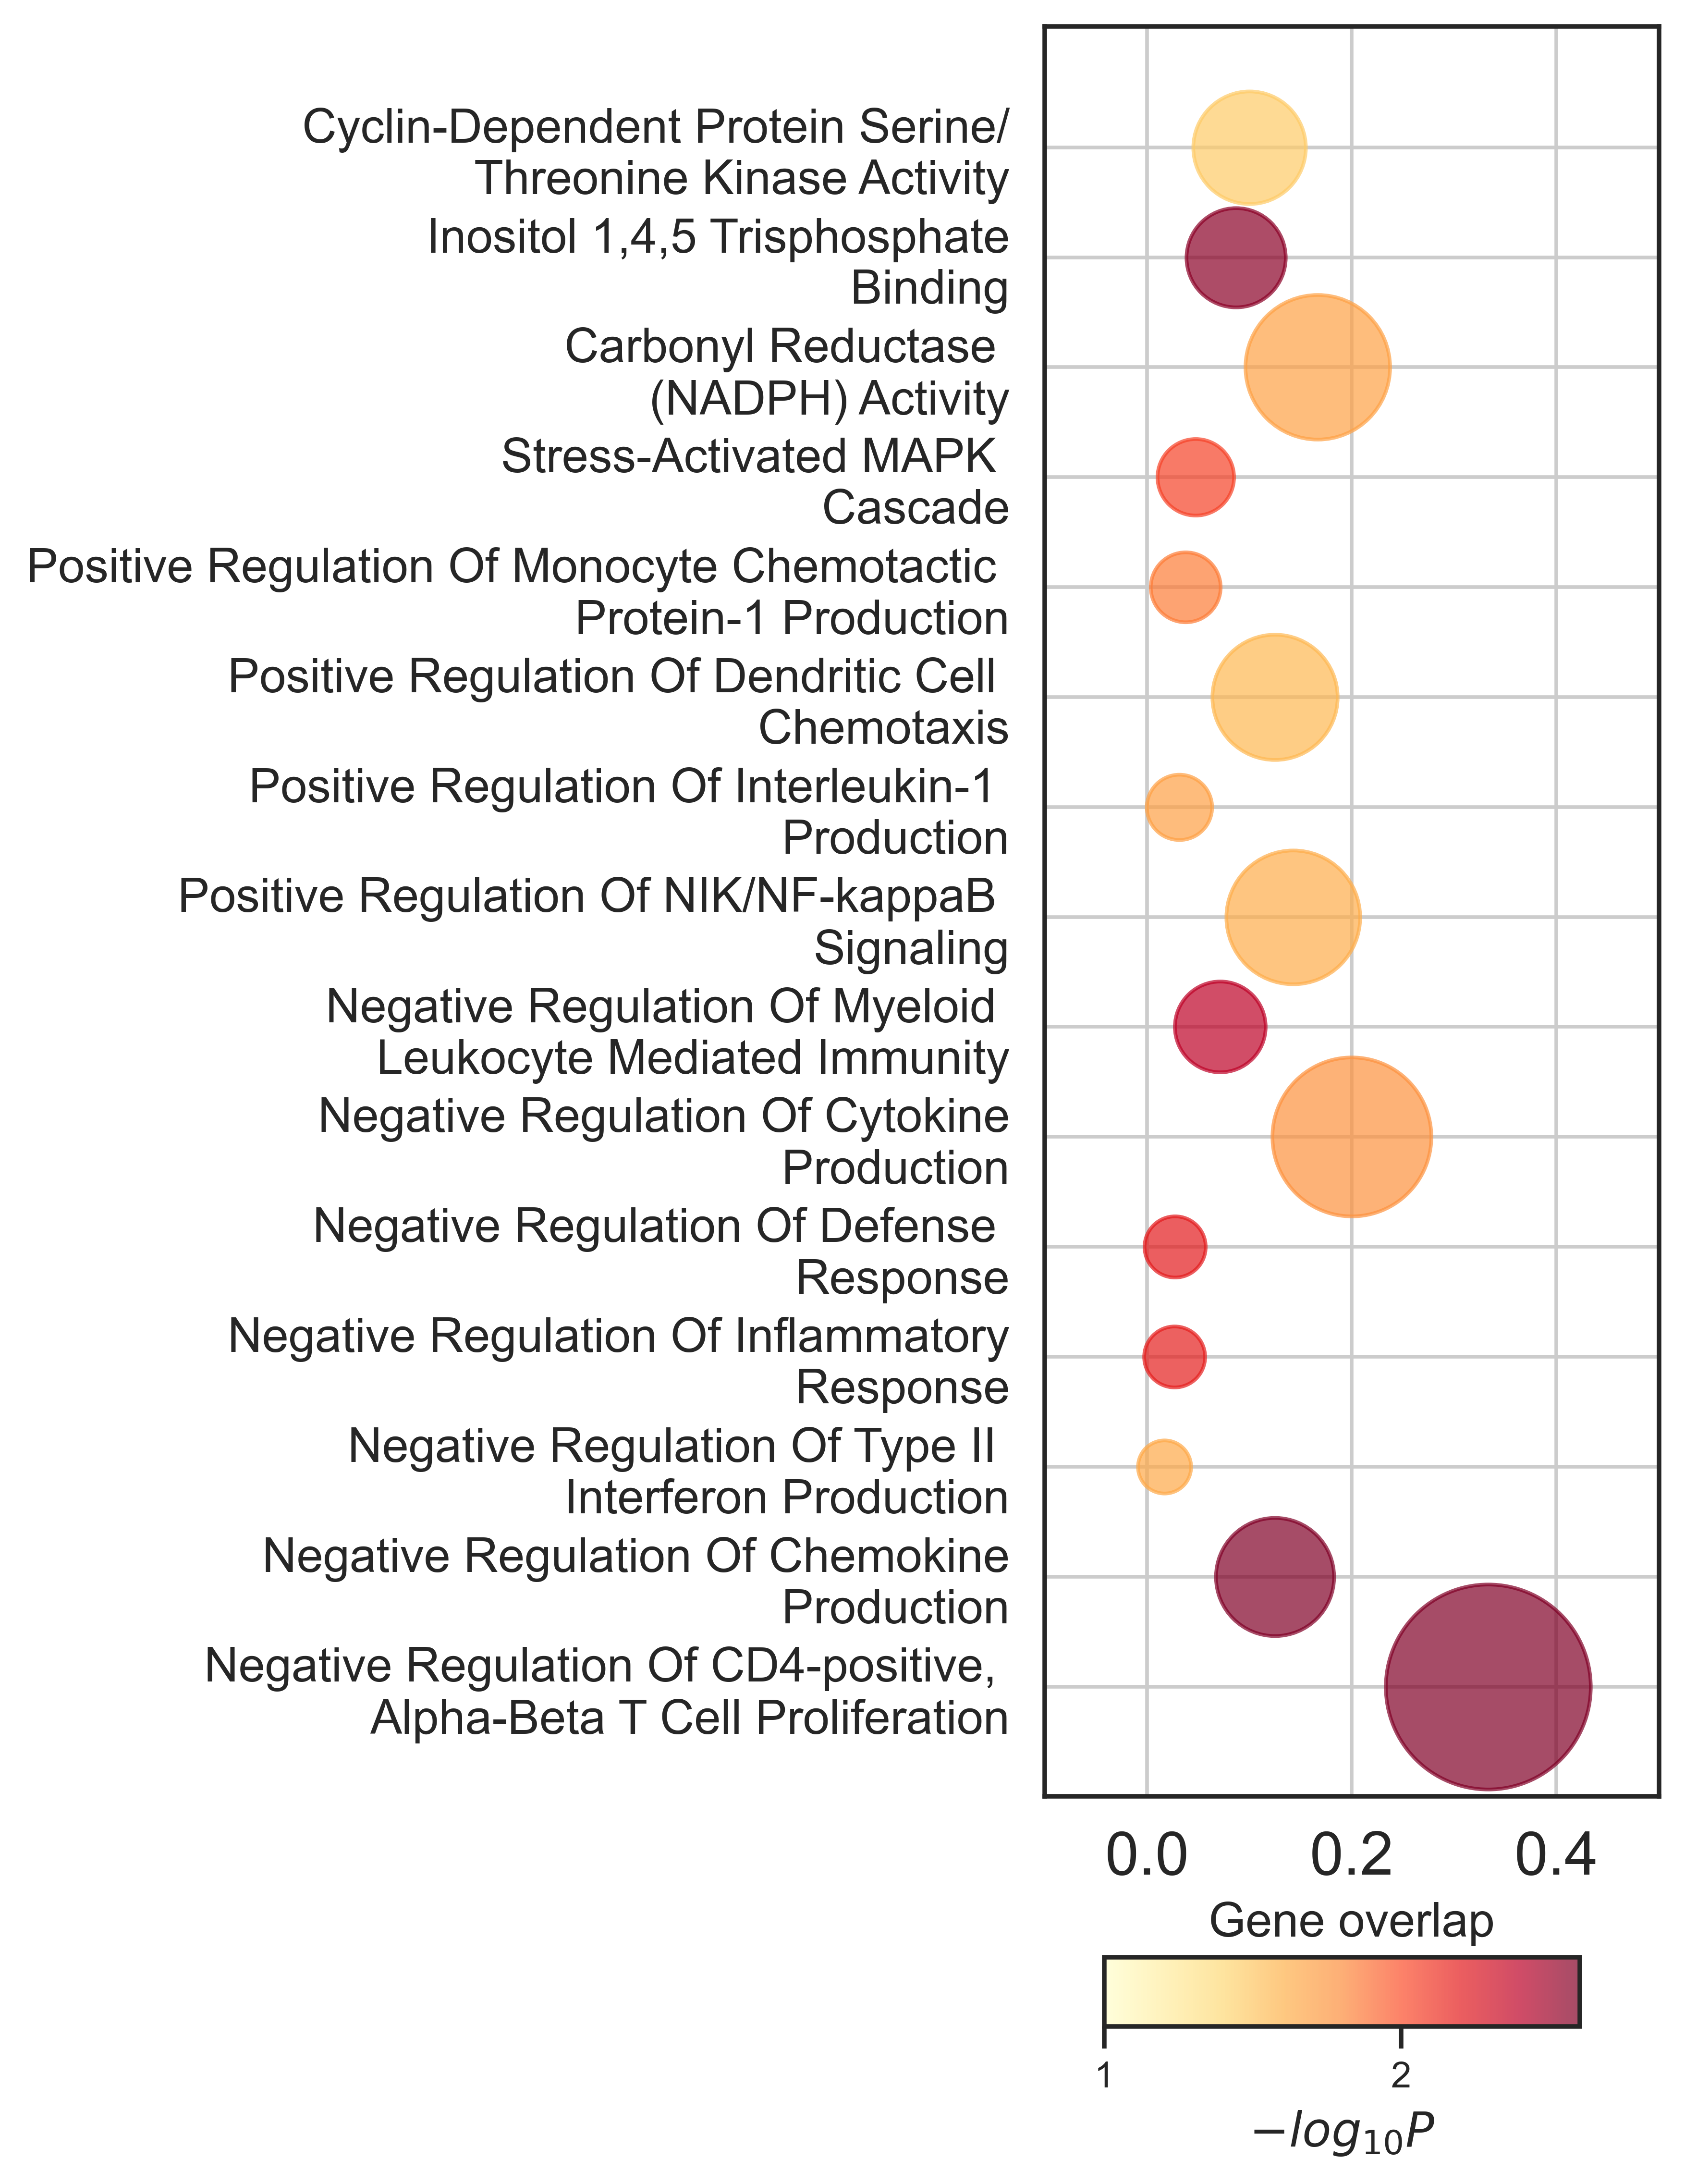

In [149]:
plt.rcParams['font.family'] = 'Arial'

vmax=-np.log10(0.05)*2
plt.figure(figsize=(3,8.7),dpi=550)

for i,index in enumerate(plot_BPCCMF.index):
            plt.scatter(plot_BPCCMF.loc[index,'Overlap_float'],i, c=plot_BPCCMF.loc[index,'logP'],
                        s=plot_BPCCMF.loc[index,'Odds Ratio'].astype(float)*18+100, alpha=0.7,
                            cmap='YlOrRd',vmin=1,vmax=vmax)

plt.yticks(range(len(plot_BPCCMF)),listyticks,fontsize=13)
plt.xlabel('')  
plt.ylabel('')  
plt.title('')  
plt.ylim(-1,len(plot_BPCCMF)+0.1)
plt.xlabel('Gene overlap',fontsize=13)
plt.xlim(-0.1,0.5)
plt.grid(True)  

cbar_ax = plt.axes([0.2, 0.01, 0.6, 0.03])
cbar=plt.colorbar(shrink=0.3,orientation='horizontal',cax=cbar_ax,)
cbar.set_label(r"$-log_{10}P$", size=13)
cbar.ax.tick_params(labelsize=10) 
ticks = [1,2,]
cbar.set_ticks(ticks)



plt.tight_layout()
plt.savefig('Fig2F.pdf', bbox_inches='tight')
plt.show()

In [171]:
path='/home2/zhenglijing/work_0511/GO/CHIP/gs_ind_2.human.enrichr.reports.txt'
dfGO2=pd.read_csv(path,sep="\t")
dfGO2

Gene_set                                               Term Overlap  \
0   gs_ind_2                           ATP Binding (GO:0005524)   2/273   
1   gs_ind_2                         Actin Binding (GO:0003779)   1/173   
2   gs_ind_2                       Actinin Binding (GO:0042805)    1/20   
3   gs_ind_2         Adenyl Ribonucleotide Binding (GO:0032559)   2/300   
4   gs_ind_2                 Alpha-Actinin Binding (GO:0051393)    1/23   
..       ...                                                ...     ...   
74  gs_ind_2  Ubiquitin-Like Protein Transferase Activity (G...   1/235   
75  gs_ind_2  Ubiquitin-Protein Transferase Activity (GO:000...   1/399   
76  gs_ind_2  Voltage-Gated Chloride Channel Activity (GO:00...     1/9   
77  gs_ind_2  Voltage-Gated Monoatomic Anion Channel Activit...    1/15   
78  gs_ind_2                      Zinc Ion Binding (GO:0008270)   2/325   

     P-value  Adjusted P-value  Odds Ratio  Combined Score           Genes  
0   0.237718          0.399569    2.729680        3.921645   CDK11B;CDK11A  
1   0.447334          0.549357    2.543083        2.045783           KLHL2  
2   0.065923          0.200305   22.734270       61.820490             TTN  
3   0.271865          0.412912    2.478112        3.227619   CDK11B;CDK11A  
4   0.075437          0.212840   19.698990       50.911190             TTN  
..       ...               ...         ...             ...             ...  
74  0.553915          0.653124    1.862699        1.100379            RLIM  
75  0.748024          0.798566    1.083647        0.314604            RLIM  
76  0.030211          0.200305   52.194300      182.656200          CLCNKA  
77  0.049853          0.200305   30.584120       91.711780          CLCNKA  
78  0.303491          0.420628    2.282621        2.721805  NPEPPSP1;LIMS1  

[79 rows x 8 columns]

In [173]:
dfGO2=dfGO2[dfGO2['P-value']<0.05]

In [175]:
len(dfGO2['Term'].tolist())

19

In [176]:
dfGO2

Gene_set                                               Term Overlap  \
10  gs_ind_2   Carbonyl Reductase (NADPH) Activity (GO:0004090)     1/6   
12  gs_ind_2  Cyclin-Dependent Protein Kinase Activity (GO:0...    2/23   
13  gs_ind_2  Cyclin-Dependent Protein Serine/Threonine Kina...    2/23   
19  gs_ind_2        DNA Replication Origin Binding (GO:0003688)    1/13   
22  gs_ind_2                Endopeptidase Activity (GO:0004175)   5/311   
..       ...                                                ...     ...   
54  gs_ind_2       Protein Tyrosine Kinase Binding (GO:1990782)    2/78   
66  gs_ind_2  Store-Operated Calcium Channel Activity (GO:00...     1/9   
67  gs_ind_2                    Telethonin Binding (GO:0031433)     1/5   
76  gs_ind_2  Voltage-Gated Chloride Channel Activity (GO:00...     1/9   
77  gs_ind_2  Voltage-Gated Monoatomic Anion Channel Activit...    1/15   

     P-value  Adjusted P-value  Odds Ratio  Combined Score  \
10  0.020242          0.200305   80.680440       314.65510   
12  0.002741          0.105151   35.069530       206.88590   
13  0.002741          0.105151   35.069530       206.88590   
19  0.043350          0.200305   35.482420       111.36010   
22  0.003993          0.105151    5.656472        31.24180   
..       ...               ...         ...             ...   
54  0.028900          0.200305    9.819082        34.79800   
66  0.030211          0.200305   52.194300       182.65620   
67  0.016896          0.200305   98.616160       402.42040   
76  0.030211          0.200305   52.194300       182.65620   
77  0.049853          0.200305   30.584120        91.71178   

                             Genes  
10                         DHRS4L1  
12                   CDK11B;CDK11A  
13                   CDK11B;CDK11A  
19                           DDX11  
22  PRSS1;ADAM21;MST1L;HP;USP17L17  
..                             ...  
54                    DUSP22;MST1L  
66                           TRPC3  
67                             TTN  
76                          CLCNKA  
77                          CLCNKA  

[19 rows x 8 columns]

In [177]:
dfGO2['Term'].tolist()

['Carbonyl Reductase (NADPH) Activity (GO:0004090)',
 'Cyclin-Dependent Protein Kinase Activity (GO:0097472)',
 'Cyclin-Dependent Protein Serine/Threonine Kinase Activity (GO:0004693)',
 'DNA Replication Origin Binding (GO:0003688)',
 'Endopeptidase Activity (GO:0004175)',
 'G-quadruplex DNA Binding (GO:0051880)',
 'Histone H3K4 Methyltransferase Activity (GO:0042800)',
 'Inositol 1,4,5 Trisphosphate Binding (GO:0070679)',
 'MAP Kinase Kinase Activity (GO:0004708)',
 'Muscle Alpha-Actinin Binding (GO:0051371)',
 'Neurexin Family Protein Binding (GO:0042043)',
 'Olfactory Receptor Activity (GO:0004984)',
 'Protein Kinase Binding (GO:0019901)',
 'Protein Tyrosine Kinase Activity (GO:0004713)',
 'Protein Tyrosine Kinase Binding (GO:1990782)',
 'Store-Operated Calcium Channel Activity (GO:0015279)',
 'Telethonin Binding (GO:0031433)',
 'Voltage-Gated Chloride Channel Activity (GO:0005247)',
 'Voltage-Gated Monoatomic Anion Channel Activity (GO:0008308)']

In [178]:
path='/home2/zhenglijing/work_0511/GO/CHIP/gs_ind_0.human.enrichr.reports.txt'
dfGO=pd.read_csv(path,sep="\t")
dfGO

Gene_set                                               Term Overlap  \
0    gs_ind_0           Actin Filament Organization (GO:0007015)   1/144   
1    gs_ind_0                      Actin Nucleation (GO:0045010)    1/23   
2    gs_ind_0     Actomyosin Structure Organization (GO:0031032)    1/77   
3    gs_ind_0           Acute Inflammatory Response (GO:0002526)    1/26   
4    gs_ind_0                       Amide Transport (GO:0042886)    1/32   
..        ...                                                ...     ...   
462  gs_ind_0       Wybutosine Biosynthetic Process (GO:0031591)     1/5   
463  gs_ind_0          Wybutosine Metabolic Process (GO:0031590)     1/5   
464  gs_ind_0  intra-Golgi Vesicle-Mediated Transport (GO:000...    1/33   
465  gs_ind_0                       p38MAPK Cascade (GO:0038066)     1/8   
466  gs_ind_0                     tRNA Modification (GO:0006400)    1/67   

      P-value  Adjusted P-value  Odds Ratio  Combined Score   Genes  
0    0.389273          0.447759    3.063140        2.889998     TTN  
1    0.075437          0.206018   19.698990       50.911190  WASH2P  
2    0.231311          0.312203    5.772430        8.450792     TTN  
3    0.084856          0.214204   17.377900       42.867810      HP  
4    0.103412          0.220519   14.062050       31.907220  ABCA13  
..        ...               ...         ...             ...     ...  
462  0.016896          0.185952   98.616160      402.420400   TYW1B  
463  0.016896          0.185952   98.616160      402.420400   TYW1B  
464  0.106469          0.220982   13.628440       30.526350   RAB6D  
465  0.026899          0.185952   59.157580      213.893900  MAP2K3  
466  0.204533          0.293898    6.645022       10.545830   TYW1B  

[467 rows x 8 columns]

In [179]:
dfGO=dfGO[dfGO['P-value']<0.05]

In [196]:
dfGO

Gene_set                                               Term Overlap  \
11   gs_ind_0              Cardiac Cell Development (GO:0055006)    1/14   
15   gs_ind_0            Cardiac Muscle Hypertrophy (GO:0003300)     1/7   
18   gs_ind_0            Cardiac Myofibril Assembly (GO:0055003)    1/15   
20   gs_ind_0       Cell Proliferation In Forebrain (GO:0021846)    1/10   
29   gs_ind_0  Cellular Response To Growth Factor Stimulus (G...   3/155   
..        ...                                                ...     ...   
445  gs_ind_0           Striated Muscle Hypertrophy (GO:0014897)     1/5   
453  gs_ind_0    Transepithelial Chloride Transport (GO:0030321)     1/6   
462  gs_ind_0       Wybutosine Biosynthetic Process (GO:0031591)     1/5   
463  gs_ind_0          Wybutosine Metabolic Process (GO:0031590)     1/5   
465  gs_ind_0                       p38MAPK Cascade (GO:0038066)     1/8   

      P-value  Adjusted P-value  Odds Ratio  Combined Score  \
11   0.046607          0.187753   32.851850       100.72410   
15   0.023576          0.185952   68.263400       255.81920   
18   0.049853          0.187753   30.584120        91.71178   
20   0.033512          0.185952   46.696970       158.57560   
29   0.015701          0.185952    7.004349        29.09643   
..        ...               ...         ...             ...   
445  0.016896          0.185952   98.616160       402.42040   
453  0.020242          0.185952   80.680440       314.65510   
462  0.016896          0.185952   98.616160       402.42040   
463  0.016896          0.185952   98.616160       402.42040   
465  0.026899          0.185952   59.157580       213.89390   

                   Genes  
11                   TTN  
15                   TTN  
18                   TTN  
20                CEP120  
29   DUSP22;MAP2K3;LIMS1  
..                   ...  
445                  TTN  
453               CLCNKA  
462                TYW1B  
463                TYW1B  
465               MAP2K3  

[124 rows x 8 columns]

In [202]:
len(dfGO['Genes'].unique())

50

In [203]:
gene_sets = []
for gene_str in dfGO['Genes']:
    if pd.isna(gene_str):        gene_sets.append(set())
    else:
        genes = [g.strip() for g in gene_str.split(';')]
        gene_sets.append(set(genes))

all_genes = set().union(*gene_sets)

In [204]:
len(all_genes)

36

In [181]:
len(dfGO['Term'].tolist())

124

In [186]:
dfGO['Term'].tolist()

['Cardiac Cell Development (GO:0055006)',
 'Cardiac Muscle Hypertrophy (GO:0003300)',
 'Cardiac Myofibril Assembly (GO:0055003)',
 'Cell Proliferation In Forebrain (GO:0021846)',
 'Cellular Response To Growth Factor Stimulus (GO:0071363)',
 'Cellular Response To Hydroxyurea (GO:0072711)',
 'Ceramide Transport (GO:0035627)',
 'Chondroitin Sulfate Proteoglycan Metabolic Process (GO:0050654)',
 'Dermatan Sulfate Metabolic Process (GO:0030205)',
 'Dermatan Sulfate Proteoglycan Biosynthetic Process (GO:0050651)',
 'Dermatan Sulfate Proteoglycan Metabolic Process (GO:0050655)',
 'Detection Of Chemical Stimulus Involved In Sensory Perception (GO:0050907)',
 'Detection Of Chemical Stimulus Involved In Sensory Perception Of Smell (GO:0050911)',
 'Detection Of Muscle Stretch (GO:0035995)',
 'Dosage Compensation By Inactivation Of X Chromosome (GO:0009048)',
 'G-quadruplex DNA Unwinding (GO:0044806)',
 'Glycosyl Compound Biosynthetic Process (GO:1901659)',
 'Hepatocyte Growth Factor Receptor Sign

In [191]:
listx=['Macrophage','T Cell','CD4','Chemokine','Cytokine','Defense Inflammatory','Leukocyte',
       ' Natural Killer Cell', 'Toll-Like Receptor','Interferon','Host','Dendritic',
       'Interleukin','Monocyte','NIK/NF-kappaB','Viral','Mast','Notch ','Oxidoreductase','MAPK']           

In [192]:
new_df = dfGO[dfGO['Term'].str.contains('|'.join(listx), case=False, regex=True)]

In [193]:
new_df

Gene_set                                               Term Overlap  \
106  gs_ind_0                          MAPK Cascade (GO:0000165)    2/98   
107  gs_ind_0                 Macrophage Chemotaxis (GO:0048246)    1/11   
108  gs_ind_0                  Macrophage Migration (GO:1905517)    1/12   
132  gs_ind_0  Negative Regulation Of Activated T Cell Prolif...    1/10   
133  gs_ind_0  Negative Regulation Of Alpha-Beta T Cell Proli...     2/9   
..        ...                                                ...     ...   
385  gs_ind_0  Regulation Of Oxidoreductase Activity (GO:0051...    1/13   
399  gs_ind_0  Regulation Of T Cell Activation Via T Cell Rec...     1/5   
405  gs_ind_0  Regulation Of Type II Interferon Production (G...    2/87   
442  gs_ind_0         Stress-Activated MAPK Cascade (GO:0051403)    2/42   
465  gs_ind_0                       p38MAPK Cascade (GO:0038066)     1/8   

      P-value  Adjusted P-value  Odds Ratio  Combined Score           Genes  
106  0.043828          0.187753    7.773356        24.31111   MAP2K3;LGALS9  
107  0.036802          0.187753   42.246750       139.50700            SAA1  
108  0.040081          0.187753   38.570490       124.07520            SAA1  
132  0.033512          0.185952   46.696970       158.57560          LGALS9  
133  0.000402          0.057132  100.628900       786.79210  LGALS9C;LGALS9  
..        ...               ...         ...             ...             ...  
385  0.043350          0.187753   35.482420       111.36010              HP  
399  0.016896          0.185952   98.616160       402.42040          LGALS9  
405  0.035315          0.187753    8.780069        29.35558  LGALS9C;LGALS9  
442  0.008953          0.185952   18.592970        87.67963   MAP2K3;LGALS9  
465  0.026899          0.185952   59.157580       213.89390          MAP2K3  

[46 rows x 8 columns]

## BP 

In [101]:
orrnk

logOR
gene                
HERC2P2    52.901999
HERC2P2    52.901999
ASTL       52.901999
BMS1P22    52.901999
LOC390705  52.894466
...              ...
POTEM      -2.000000
RSPH10B    -2.321928
NBPF1      -2.321928
ZDHHC11    -3.459432
DUSP22     -3.584963

[1149 rows x 1 columns]

In [98]:
pre_res = gp.prerank(rnk=orrnk, # or rnk = rnk,
                     gene_sets=GO_BP_23,
                     threads=4,
                     min_size=2,
                     max_size=5000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )

2025-07-20 23:04:06,610 [INFO] Input gene rankings contains duplicated IDs
2025-07-20 23:04:06,617 [WARNING] Duplicated values found in preranked stats: 56.57% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-07-20 23:04:06,619 [INFO] Parsing data files for GSEA.............................
2025-07-20 23:04:06,642 [INFO] 4933 gene_sets have been filtered out when max_size=5000 and min_size=2
2025-07-20 23:04:06,643 [INFO] 0474 gene_sets used for further statistical testing.....
2025-07-20 23:04:06,643 [INFO] Start to run GSEA...Might take a while..................
2025-07-20 23:04:07,756 [INFO] Congratulations. GSEApy runs successfully................



In [99]:
import pandas as pd

df = pre_res.res2d
filtered_df = df[(df['NOM p-val'] < 0.05)&(df['NES'] > 0)]

filtered_df

Name                                               Term        ES  \
4   prerank  Sulfur Compound Biosynthetic Process (GO:0044272)  0.993025   
5   prerank  Monocarboxylic Acid Biosynthetic Process (GO:0...  0.993019   
6   prerank             Epithelial Cell Migration (GO:0010631)  0.987379   
7   prerank    Insulin Receptor Signaling Pathway (GO:0008286)  0.972659   
8   prerank      Positive Regulation Of Autophagy (GO:0010508)  0.973388   
9   prerank  Positive Regulation Of Cellular Catabolic Proc...  0.973388   
13  prerank  Phosphatidylinositol Phosphate Biosynthetic Pr...  0.972659   
14  prerank  Sensory Perception Of Chemical Stimulus (GO:00...  0.962878   
15  prerank  Phosphatidylinositol Biosynthetic Process (GO:...  0.945763   
19  prerank  Positive Regulation Of Plasma Membrane Bounded...  0.934441   
55  prerank  Regulation Of Transcription By RNA Polymerase ...   0.81043   

         NES NOM p-val FDR q-val FWER p-val Tag %  Gene %  \
4   1.330798  0.006042   0.30002      0.137   1/2   0.78%   
5   1.324887       0.0   0.32334       0.25   1/3   0.78%   
6   1.312409  0.005908  0.715173      0.552   1/2   0.96%   
7   1.304228  0.016973  0.940398      0.729   1/2   0.96%   
8   1.294556   0.02406       1.0      0.872   1/2   2.35%   
9   1.294556   0.02406       1.0      0.872   1/2   2.35%   
13  1.286098  0.017804       1.0      0.931   1/2   0.96%   
14  1.283641  0.033071       1.0      0.947   1/2   1.91%   
15  1.269002  0.016949       1.0      0.988   2/4   4.18%   
19  1.253447  0.043257       1.0      0.999   2/3   2.70%   
55  1.191347  0.024121       1.0        1.0  7/14  16.45%   

                                     Lead_genes  
4                                           DSE  
5                                           DSE  
6                                        PIK3CA  
7                                        PIK3CA  
8                                        TRIM34  
9                                        TRIM34  
13                                       PIK3CA  
14                                        OR8I2  
15                                 PIK3CA;CWH43  
19                                 PIK3CA;CROCC  
55  EVX1;NOC2L;FOXD4L3;EFCAB7;GRHL3;BCLAF1;SOD2

In [67]:
path='/home2/zhenglijing/work/GSEA/BP_significant.csv'
filtered_df.to_csv(path)

In [104]:
path='/home2/zhenglijing/work/GSEA/BP_significant.csv'
filtered_df=pd.read_csv(path)

In [105]:
listBP=list(filtered_df['Term'].unique())
listBP

['Sulfur Compound Biosynthetic Process (GO:0044272)',
 'Monocarboxylic Acid Biosynthetic Process (GO:0072330)',
 'Epithelial Cell Migration (GO:0010631)',
 'Insulin Receptor Signaling Pathway (GO:0008286)',
 'Positive Regulation Of Autophagy (GO:0010508)',
 'Positive Regulation Of Cellular Catabolic Process (GO:0031331)',
 'Phosphatidylinositol Phosphate Biosynthetic Process (GO:0046854)',
 'Sensory Perception Of Chemical Stimulus (GO:0007606)',
 'Phosphatidylinositol Biosynthetic Process (GO:0006661)',
 'Positive Regulation Of Plasma Membrane Bounded Cell Projection Assembly (GO:0120034)',
 'Regulation Of Transcription By RNA Polymerase II (GO:0006357)']

In [137]:
listbppathway=['Leukotriene Biosynthetic Process (GO:0019370)',
 'Leukotriene D4 Biosynthetic Process (GO:1901750)',
 'Fatty Acid Derivative Biosynthetic Process (GO:1901570)',
 'Leukotriene D4 Metabolic Process (GO:1901748)',
 'Positive Regulation Of Cellular Catabolic Process (GO:0031331)',
 'Positive Regulation Of Autophagy (GO:0010508)',
 'Negative Regulation Of Reproductive Process (GO:2000242)',
 'Sensory Perception Of Chemical Stimulus (GO:0007606)',
 'Positive Regulation Of DNA-binding Transcription Factor Activity (GO:0051091)',
 'Regulation Of Viral Entry Into Host Cell (GO:0046596)',
 'Positive Regulation Of NF-kappaB Transcription Factor Activity (GO:0051092)']

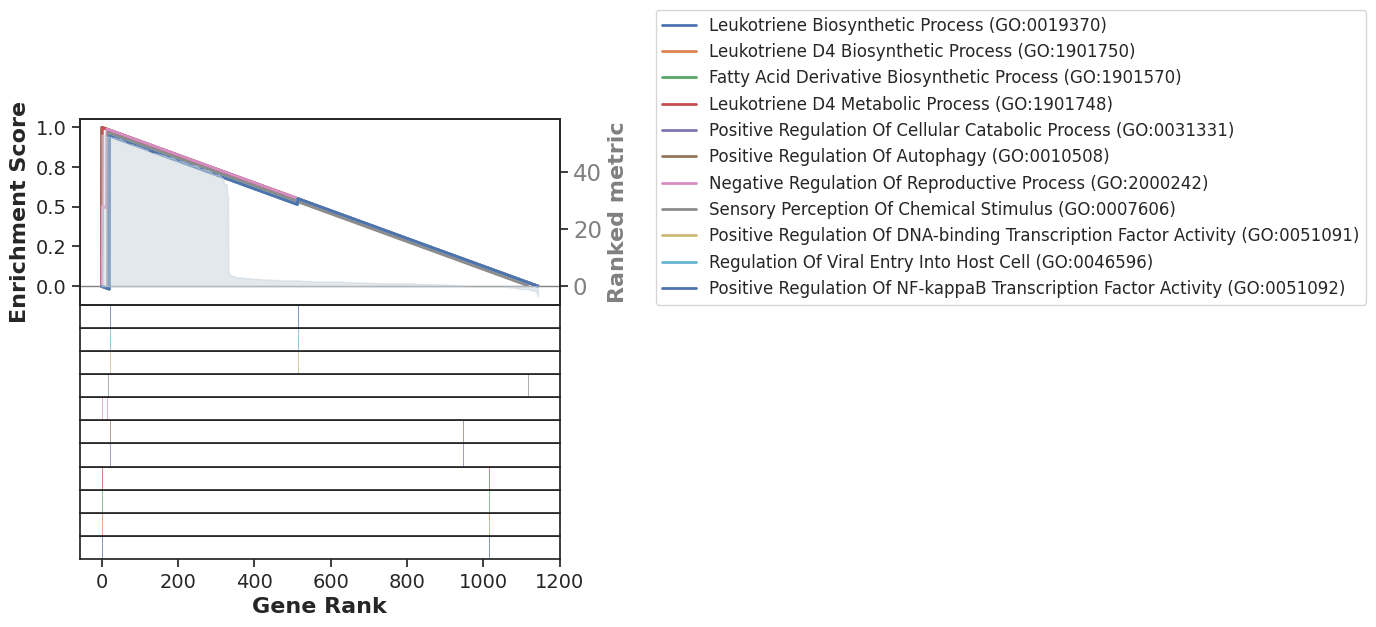

In [138]:
axs = pre_res.plot(terms=listbppathway,
                   legend_kws={'loc': (1.2, 0),'fontsize':12}, 
                   show_ranking=True, # whether to show the second yaxis
                   figsize=(6,6)
                  )


## CC

In [106]:
pre_res = gp.prerank(rnk=orrnk, # or rnk = rnk,
                     gene_sets=GO_CC_23,
                     threads=4,
                     min_size=2,
                     max_size=5000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    ) 

2025-07-20 23:14:13,364 [INFO] Input gene rankings contains duplicated IDs
2025-07-20 23:14:13,372 [WARNING] Duplicated values found in preranked stats: 56.57% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-07-20 23:14:13,373 [INFO] Parsing data files for GSEA.............................
2025-07-20 23:14:13,379 [INFO] 0406 gene_sets have been filtered out when max_size=5000 and min_size=2
2025-07-20 23:14:13,380 [INFO] 0068 gene_sets used for further statistical testing.....
2025-07-20 23:14:13,380 [INFO] Start to run GSEA...Might take a while..................
2025-07-20 23:14:13,585 [INFO] Congratulations. GSEApy runs successfully................



In [107]:
import pandas as pd

df = pre_res.res2d
filtered_df2 = df[(df['NOM p-val'] < 0.05)&(df['NES'] > 0)]


filtered_df2

Empty DataFrame
Columns: [Name, Term, ES, NES, NOM p-val, FDR q-val, FWER p-val, Tag %, Gene %, Lead_genes]
Index: []

In [108]:
listCC=list(filtered_df2['Term'].unique())
listCC

[]

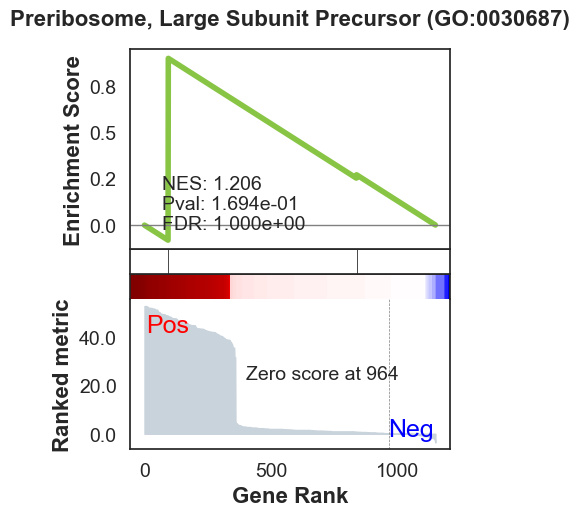

In [109]:
terms = pre_res.res2d.Term
axs = pre_res.plot(terms=terms[1]) # v1.0.5

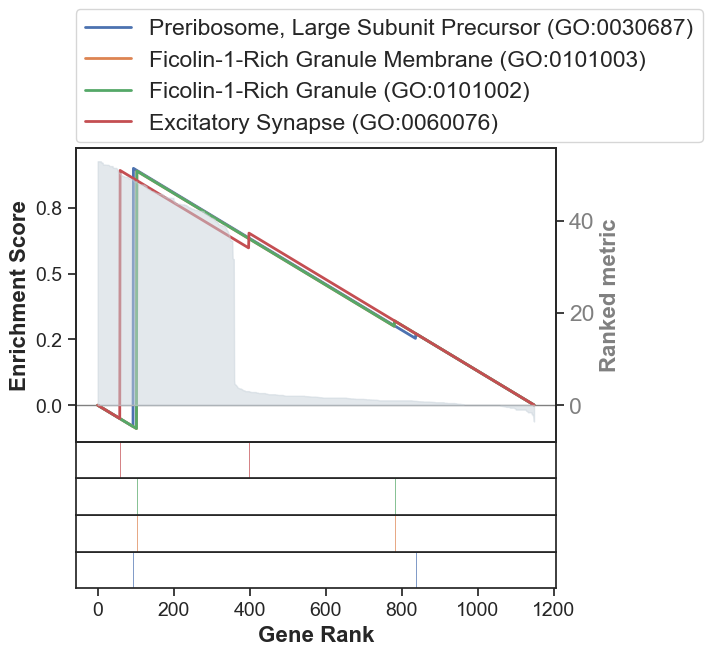

In [110]:
axs = pre_res.plot(terms=terms[1:5],
                   show_ranking=True, # whether to show the second yaxis
                   figsize=(3,4)
                  )


## MF

In [111]:
pre_res = gp.prerank(rnk=orrnk, # or rnk = rnk,
                     gene_sets=GO_MF_23,
                     threads=4,
                     min_size=2,
                     max_size=5000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )

2025-07-20 23:14:51,274 [INFO] Input gene rankings contains duplicated IDs
2025-07-20 23:14:51,281 [WARNING] Duplicated values found in preranked stats: 56.57% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-07-20 23:14:51,282 [INFO] Parsing data files for GSEA.............................
2025-07-20 23:14:51,289 [INFO] 1051 gene_sets have been filtered out when max_size=5000 and min_size=2
2025-07-20 23:14:51,290 [INFO] 0096 gene_sets used for further statistical testing.....
2025-07-20 23:14:51,291 [INFO] Start to run GSEA...Might take a while..................
2025-07-20 23:14:51,546 [INFO] Congratulations. GSEApy runs successfully................



In [112]:
import pandas as pd

df = pre_res.res2d
filtered_df3 = df[(df['NOM p-val']< 0.05)&(df['NES'] > 0)]

filtered_df3

Name                                               Term        ES  \
4  prerank                       Kinase Activity (GO:0016301)  0.972659   
5  prerank  Phosphatidylinositol Kinase Activity (GO:0052742)  0.972659   

        NES NOM p-val FDR q-val FWER p-val Tag % Gene % Lead_genes  
4  1.286098  0.017804  0.699227      0.577   1/2  0.96%     PIK3CA  
5  1.286098  0.017804  0.699227      0.577   1/2  0.96%     PIK3CA

In [113]:
listMF=list(filtered_df3['Term'].unique())
listMF

['Kinase Activity (GO:0016301)',
 'Phosphatidylinositol Kinase Activity (GO:0052742)']

In [127]:
filtered_dfb=filtered_df3[filtered_df3['Term'].isin(['GTPase Activator Activity (GO:0005096)',
'Cytokine Activity (GO:0005125)',

'Ubiquitin-Protein Transferase Activity (GO:0004842)',

'Calcium Ion Transmembrane Transporter Activity (GO:0015085)'])]

## cMSigDB_Hallmark_2020

In [128]:
len(orrnk)

1149

In [114]:
for i in ['MSigDB_Hallmark_2020']:
    pre_res_7= gp.prerank(rnk=orrnk, # or rnk = rnk,
                         gene_sets=i,
                         threads=4,
                         min_size=1,
                         max_size=10000,
                         permutation_num=1000, # reduce number to speed up testing
                         outdir=i, # don't write to disk
                         seed=6,
                         verbose=True, # see what's going on behind the scenes
                        )

2025-07-20 23:15:49,071 [INFO] Input gene rankings contains duplicated IDs
2025-07-20 23:15:49,078 [WARNING] Duplicated values found in preranked stats: 56.57% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-07-20 23:15:49,079 [INFO] Parsing data files for GSEA.............................
2025-07-20 23:15:49,089 [INFO] Enrichr library gene sets already downloaded in: /home2/zhenglijing/.cache/gseapy, use local file
2025-07-20 23:15:49,115 [INFO] 0013 gene_sets have been filtered out when max_size=10000 and min_size=1
2025-07-20 23:15:49,117 [INFO] 0037 gene_sets used for further statistical testing.....
2025-07-20 23:15:49,118 [INFO] Start to run GSEA...Might take a while..................
2025-07-20 23:15:49,267 [INFO] Start to generate gseapy reports, and produce figures...
2025-07-20 23:15:49,269 [INFO] Congratulations. GSEApy runs successfully................



In [115]:
dfhallmark= pre_res_7.res2d
hallmark_df = dfhallmark[(dfhallmark['NOM p-val']< 0.05)&(dfhallmark['NES'] > 0)]

hallmark_df

Name        Term        ES       NES NOM p-val FDR q-val FWER p-val  \
1  prerank  Complement  0.977332  1.296596  0.012712  0.359278      0.354   

  Tag % Gene %  Lead_genes  
1   2/2  2.44%  PIK3CA;CFH

In [116]:
hallmark_df['Term'].tolist()

['Complement']

In [117]:
filtered_dfc=hallmark_df

##  KEGG_2021_Human

In [118]:
for i in ['KEGG_2021_Human']:
    pre_res_6= gp.prerank(rnk=orrnk, # or rnk = rnk,
                         gene_sets=i,
                         threads=4,
                         min_size=1,
                         max_size=5000,
                         permutation_num=1000, # reduce number to speed up testing
                         outdir=i, # don't write to disk
                         seed=6,
                         verbose=True, # see what's going on behind the scenes
                        )

2025-07-20 23:15:56,773 [INFO] Input gene rankings contains duplicated IDs
2025-07-20 23:15:56,781 [WARNING] Duplicated values found in preranked stats: 56.57% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-07-20 23:15:56,782 [INFO] Parsing data files for GSEA.............................
2025-07-20 23:15:56,783 [INFO] Enrichr library gene sets already downloaded in: /home2/zhenglijing/.cache/gseapy, use local file
2025-07-20 23:15:56,839 [INFO] 0124 gene_sets have been filtered out when max_size=5000 and min_size=1
2025-07-20 23:15:56,840 [INFO] 0196 gene_sets used for further statistical testing.....
2025-07-20 23:15:56,841 [INFO] Start to run GSEA...Might take a while..................
2025-07-20 23:16:02,879 [INFO] Start to generate gseapy reports, and produce figures...
2025-07-20 23:16:02,881 [INFO] Congratulations. GSEApy runs successfully................



In [119]:
dfKEGG= pre_res_6.res2d
KEGG_df = dfKEGG[(dfKEGG['NOM p-val']< 0.05)&(dfKEGG['NES'] > 0)]

KEGG_df



Name                                            Term        ES  \
1   prerank                  Glycosaminoglycan biosynthesis  0.993031   
2   prerank                 Human cytomegalovirus infection  0.987372   
3   prerank                      JAK-STAT signaling pathway  0.991282   
4   prerank                             MicroRNAs in cancer  0.987379   
5   prerank               Phospholipase D signaling pathway  0.991289   
..      ...                                             ...       ...   
44  prerank            Toll-like receptor signaling pathway  0.938996   
46  prerank                           Ras signaling pathway   0.96681   
47  prerank                      Osteoclast differentiation  0.949072   
49  prerank                                         Malaria  0.964161   
55  prerank  Growth hormone synthesis, secretion and action  0.938996   

         NES NOM p-val FDR q-val FWER p-val Tag % Gene % Lead_genes  
1   1.331374  0.018036  0.322076      0.145   1/1  0.78%        DSE  
2   1.316349       0.0  0.558857      0.415   1/3  0.96%     PIK3CA  
3   1.314552   0.00292  0.421247      0.446   1/2  0.96%     PIK3CA  
4   1.312409  0.005908  0.379395      0.486   1/2  0.96%     PIK3CA  
5   1.306859  0.009363  0.064057      0.571   1/1  0.96%     PIK3CA  
..       ...       ...       ...        ...   ...    ...        ...  
44  1.265184  0.040353  0.206384      0.939   1/3  0.96%     PIK3CA  
46  1.262844  0.026471  0.205629      0.942   1/2  0.96%     PIK3CA  
47  1.260039  0.023316  0.212985       0.95   1/3  0.96%     PIK3CA  
49  1.259083   0.03962  0.208302      0.951   1/2  2.87%       GYPA  
55  1.255823  0.045743  0.196546      0.956   1/3  0.96%     PIK3CA  

[47 rows x 10 columns]

In [120]:
KEGG_df['Term'].tolist()

['Glycosaminoglycan biosynthesis',
 'Human cytomegalovirus infection',
 'JAK-STAT signaling pathway',
 'MicroRNAs in cancer',
 'Phospholipase D signaling pathway',
 'Renal cell carcinoma',
 'Regulation of lipolysis in adipocytes',
 'Fluid shear stress and atherosclerosis',
 'Gastric cancer',
 'Type II diabetes mellitus',
 'Kaposi sarcoma-associated herpesvirus infection',
 'Acute myeloid leukemia',
 'Melanoma',
 'AGE-RAGE signaling pathway in diabetic complications',
 'Viral carcinogenesis',
 'Relaxin signaling pathway',
 'ErbB signaling pathway',
 'Central carbon metabolism in cancer',
 'Cholinergic synapse',
 'Glioma',
 'Colorectal cancer',
 'Prolactin signaling pathway',
 'Hepatocellular carcinoma',
 'Breast cancer',
 'GnRH secretion',
 'HIF-1 signaling pathway',
 'Chronic myeloid leukemia',
 'VEGF signaling pathway',
 'Pancreatic cancer',
 'Signaling pathways regulating pluripotency of stem cells',
 'C-type lectin receptor signaling pathway',
 'Measles',
 'Propanoate metabolism',
 

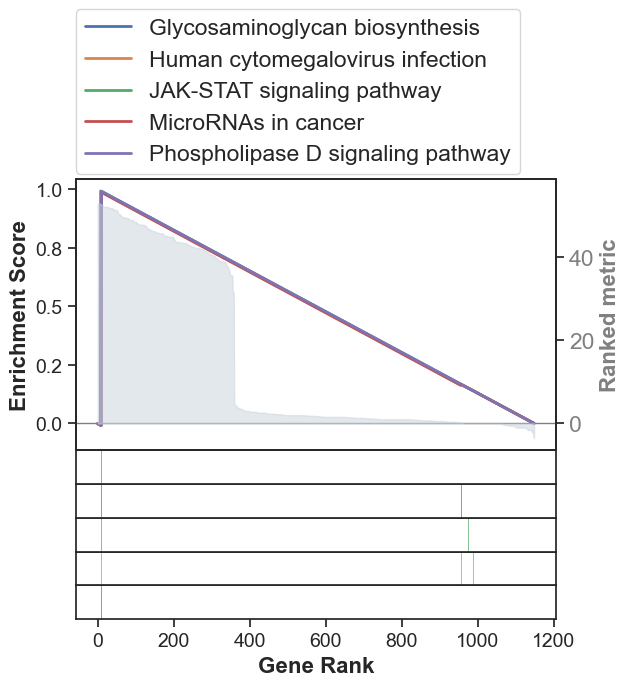

In [121]:
terms = KEGG_df['Term'].tolist()
axs = pre_res_6.plot(terms=terms[:5],
                   show_ranking=True, # whether to show the second yaxis
                   figsize=(3,4)
                  )


##  HDSigDB_Human_2021

In [122]:
for i in ['HDSigDB_Human_2021']:
    pre_res_5= gp.prerank(rnk=orrnk, # or rnk = rnk,
                         gene_sets=i,
                         threads=4,
                         min_size=2,
                         max_size=5000,
                         permutation_num=1000, # reduce number to speed up testing
                         outdir=i, # don't write to disk
                         seed=6,
                         verbose=True, # see what's going on behind the scenes
                        )

2025-07-20 23:16:20,039 [INFO] Input gene rankings contains duplicated IDs
2025-07-20 23:16:20,046 [WARNING] Duplicated values found in preranked stats: 56.57% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-07-20 23:16:20,047 [INFO] Parsing data files for GSEA.............................
2025-07-20 23:16:20,048 [INFO] Enrichr library gene sets already downloaded in: /home2/zhenglijing/.cache/gseapy, use local file
2025-07-20 23:16:20,806 [INFO] 0980 gene_sets have been filtered out when max_size=5000 and min_size=2
2025-07-20 23:16:20,809 [INFO] 1584 gene_sets used for further statistical testing.....
2025-07-20 23:16:20,810 [INFO] Start to run GSEA...Might take a while..................
2025-07-20 23:16:24,912 [INFO] Start to generate gseapy reports, and produce figures...
2025-07-20 23:16:24,913 [INFO] Congratulations. GSEApy runs successfully................



In [123]:
dfHH2021= pre_res_5.res2d
HH2021_df = dfHH2021[(dfHH2021['NOM p-val'] < 0.01)&(dfHH2021['NES'] > 0)]

HH2021_df

Name                                               Term        ES  \
3    prerank  Genes Up-Regulated In Genes Changed In HDACi 4...  0.918423   
117  prerank  Genes Up-Regulated In Genes Changed In HDACi 1...  0.750292   
118  prerank  pnVLMC Post-Natal Vascular And Leptomeningeal ...  0.742718   
145  prerank  Genes Changed In Mouse Brain Derived OPCs From...  0.726843   
149  prerank  Genes Up-Regulated In Friedreich Ataxia iPSCs ...  0.726008   
..       ...                                                ...       ...   
209  prerank  Genes Up-Regulated In Expression In SA01 Line ...  0.712068   
212  prerank    Expression In 12 Wk R6/2 HD Mice (Set2) GSE9804   0.70807   
226  prerank       Genes Changed In HD Vs Normal NPCs GSE118088  0.701429   
265  prerank  Genes Down-Regulated In Expression In Huez2.3 ...  0.696807   
286  prerank  Genes Up-Regulated In Expression In SIVF020 Li...  0.694495   

          NES NOM p-val FDR q-val FWER p-val  Tag %  Gene %  \
3    1.312597  0.001028       1.0      0.657    2/9   2.70%   
117  1.145784     0.008       1.0        1.0  15/31  23.32%   
118  1.144525     0.003       1.0        1.0  27/45  24.98%   
145  1.127807     0.001       1.0        1.0  37/54  27.76%   
149  1.127156     0.006       1.0        1.0  33/58  26.37%   
..        ...       ...       ...        ...    ...     ...   
209   1.10336     0.007       1.0        1.0  28/53  27.50%   
212   1.10308     0.005       1.0        1.0  33/63  25.24%   
226  1.098171     0.003       1.0        1.0  49/87  28.20%   
265  1.089783     0.008       1.0        1.0  43/76  29.59%   
286  1.085316     0.008       1.0        1.0  43/85  27.50%   

                                            Lead_genes  
3                                      LINC00265;CROCC  
117  PIK3CA;GUSBP2;PALLD;EIF1AX;TLK1;RNF216;FRG1;AM...  
118  DSE;PIK3CA;CFH;PTPN14;EIF1AX;MAN1B1;PDPK1;AGAP...  
145  DSE;TRIM34;CFH;CROCC;CWH43;PALLD;LMNTD1;SPAG5;...  
149  HERC2P2;DSE;MCEE;NBPF1;CFH;NBPF15;LINC02693;PA...  
..                                                 ...  
209  NBPF1;LOC642846;LINC02693;PALLD;TBC1D3B;MAN1B1...  
212  DSE;MCEE;CFH;CROCC;RGPD2;ZNF595;EIF1AX;SPAG5;N...  
226  NBPF1;ANKRD30BL;CFH;SRARP;RGPD2;EVX1;MUC4;EIF1...  
265  DSE;MCEE;KIAA1671;VCX;EIF1AX;CGB5;NLN;TLK1;FAM...  
286  HERC2P2;PIK3CA;NBPF1;LOC644634;RGPD2;TUBA3E;MU...  

[19 rows x 10 columns]

In [124]:
HH2021_df['Term'].tolist()

['Genes Up-Regulated In Genes Changed In HDACi 4B Treated Vs Untreated Friedreich Ataxia Patient Blood Cells GSE30933',
 'Genes Up-Regulated In Genes Changed In HDACi 106 Vs Vehicle Treated Friedreich Ataxia Patient Blood Cells GSE30933',
 'pnVLMC Post-Natal Vascular And Leptomeningeal Cell-Enriched Genes PMID30078729',
 'Genes Changed In Mouse Brain Derived OPCs From P7 Vs E13.5 Mice PMID30078729',
 'Genes Up-Regulated In Friedreich Ataxia iPSCs Expression Vs NuFF Cell Line GSE22651',
 'Genes Down-Regulated In HD NPCs After ATF7IP Knock Down GSE118088',
 'Genes Up-Regulated In Friedreich Ataxia iPSCs Expression Vs SC41-MSC Cell Line GSE22651',
 'Genes Up-Regulated In Friedreich Ataxia iPSCs Expression Vs SC31-MSC Cell Line GSE22651',
 'Genes Up-Regulated In Expression In VUB01 Line NSCs Vs ESCs GSE34201',
 'Expression In HD180i.5 NSCs From HD Patient Vs NSCs From Healthy Controls GSE37517',
 'Genes Changed In Brain And Spinal Cord Derived OPCs From P7 Vs E13.5 Mice PMID30078729',
 'Ge

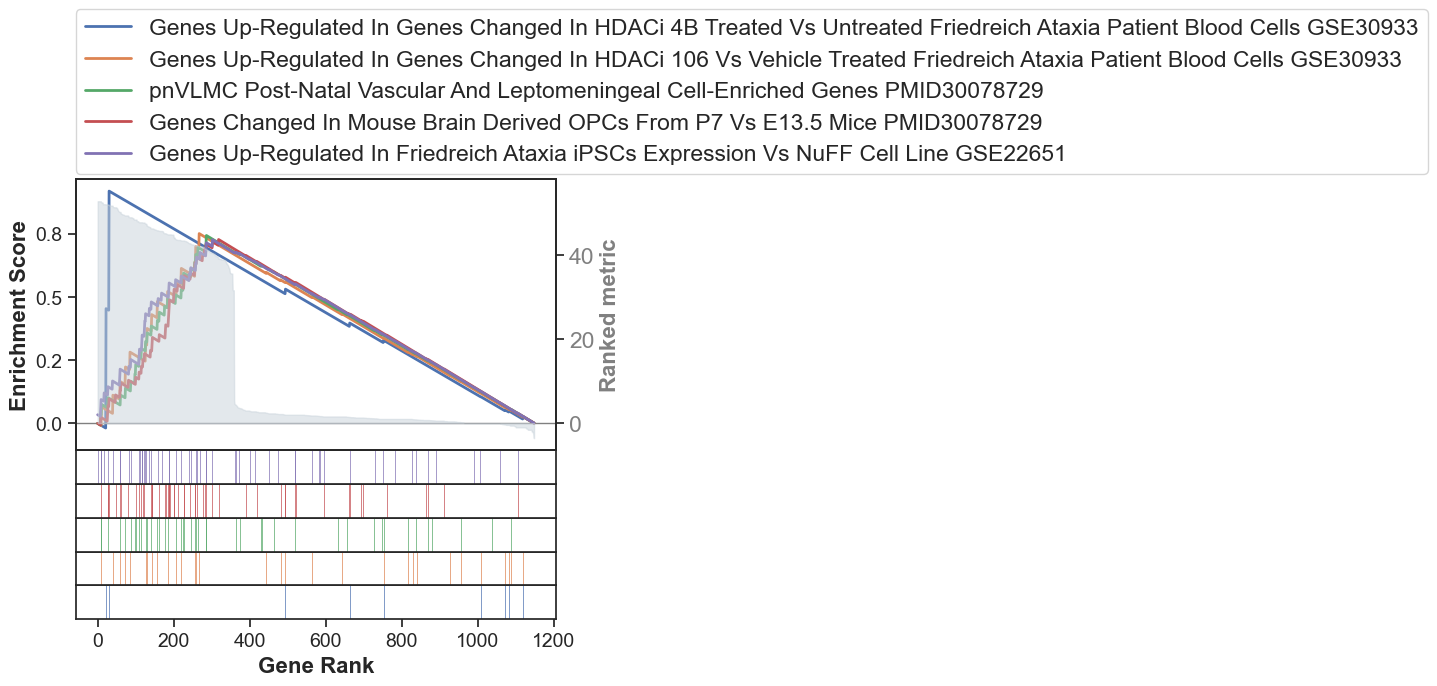

In [140]:
terms = HH2021_df['Term'].tolist()
axs = pre_res_5.plot(terms=terms[:5],
                   show_ranking=True, # whether to show the second yaxis
                   figsize=(3,4)
                  )


##  'CCLE_Proteomics_2020'

In [125]:
for i in ['CCLE_Proteomics_2020']:
    pre_res_2= gp.prerank(rnk=orrnk, # or rnk = rnk,
                         gene_sets=i,
                         threads=4,
                         min_size=2,
                         max_size=5000,
                         permutation_num=1000, # reduce number to speed up testing
                         outdir=i, # don't write to disk
                         seed=6,
                         verbose=True, # see what's going on behind the scenes
                        )

2025-07-20 23:16:38,908 [INFO] Input gene rankings contains duplicated IDs
2025-07-20 23:16:38,915 [WARNING] Duplicated values found in preranked stats: 56.57% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-07-20 23:16:38,916 [INFO] Parsing data files for GSEA.............................
2025-07-20 23:16:38,917 [INFO] Enrichr library gene sets already downloaded in: /home2/zhenglijing/.cache/gseapy, use local file
2025-07-20 23:16:39,027 [INFO] 0022 gene_sets have been filtered out when max_size=5000 and min_size=2
2025-07-20 23:16:39,029 [INFO] 0356 gene_sets used for further statistical testing.....
2025-07-20 23:16:39,029 [INFO] Start to run GSEA...Might take a while..................
2025-07-20 23:16:39,939 [INFO] Start to generate gseapy reports, and produce figures...
2025-07-20 23:16:39,940 [INFO] Congratulations. GSEApy runs successfully................



In [126]:
dfCP= pre_res_2.res2d
CP_df = dfCP[dfCP['NOM p-val'] < 0.05]

CP_df

Name                             Term        ES       NES NOM p-val  \
0  prerank          TE14 OESOPHAGUS TenPx12  0.950777  1.272444  0.014545   
1  prerank            QGP1 PANCREAS TenPx11  0.875576  1.235929   0.02935   
2  prerank  COLO320 LARGE INTESTINE TenPx14  0.906976  1.231523  0.032917   
3  prerank     HT55 LARGE INTESTINE TenPx06  0.897972  1.230205  0.025109   
4  prerank              CORL23 LUNG TenPx29  0.900709  1.219407  0.037801   
5  prerank    SW948 LARGE INTESTINE TenPx20  0.867286   1.21069  0.031453   

  FDR q-val FWER p-val Tag %  Gene %                   Lead_genes  
0       1.0      0.873   3/4   5.05%            PIK3CA;CROCC;MUC4  
1       1.0      0.991   5/8  10.79%  MCEE;RGPD2;NLN;CD93;PDE4DIP  
2       1.0      0.995   2/5   6.44%                 CROCC;EIF1AX  
3       1.0      0.996   2/6   4.26%                MCEE;KIAA1671  
4       1.0      0.999   2/5   4.26%                GYPA;KIAA1671  
5       1.0        1.0   3/7  11.05%         ZNF595;ANAPC1;RNF216

In [127]:
CP_df['Term'].tolist()

['TE14 OESOPHAGUS TenPx12',
 'QGP1 PANCREAS TenPx11',
 'COLO320 LARGE INTESTINE TenPx14',
 'HT55 LARGE INTESTINE TenPx06',
 'CORL23 LUNG TenPx29',
 'SW948 LARGE INTESTINE TenPx20']

##  'Reactome_Pathways_2024'

In [136]:
for i in ['Reactome_Pathways_2024']:
    pre_res_1 = gp.prerank(rnk=orrnk, # or rnk = rnk,
                         gene_sets=i,
                         threads=4,
                         min_size=2,
                         max_size=5000,
                         permutation_num=1000, # reduce number to speed up testing
                         outdir=i, # don't write to disk
                         seed=6,
                         verbose=True, # see what's going on behind the scenes
                        )

2025-07-20 23:26:36,772 [INFO] Input gene rankings contains duplicated IDs
2025-07-20 23:26:36,779 [WARNING] Duplicated values found in preranked stats: 56.57% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-07-20 23:26:36,780 [INFO] Parsing data files for GSEA.............................
2025-07-20 23:26:36,780 [INFO] Enrichr library gene sets already downloaded in: /home2/zhenglijing/.cache/gseapy, use local file
2025-07-20 23:26:36,834 [INFO] 1795 gene_sets have been filtered out when max_size=5000 and min_size=2
2025-07-20 23:26:36,835 [INFO] 0310 gene_sets used for further statistical testing.....
2025-07-20 23:26:36,836 [INFO] Start to run GSEA...Might take a while..................
2025-07-20 23:26:37,914 [INFO] Start to generate gseapy reports, and produce figures...
2025-07-20 23:26:37,915 [INFO] Congratulations. GSEApy runs successfully................



In [137]:
dfRP= pre_res_1.res2d
RP_df = dfRP[(dfRP['NOM p-val'] < 0.05)&(dfRP['NES'] > 0)]

RP_df

Name                                            Term        ES  \
4   prerank                                 DAP12 Signaling  0.983467   
5   prerank                              DAP12 Interactions  0.983467   
6   prerank                              Signaling by ERBB4  0.974774   
7   prerank           Role of Phospholipids in Phagocytosis  0.972659   
8   prerank  Fcgamma Receptor (FCGR) Dependent Phagocytosis  0.972659   
9   prerank  Cell Surface Interactions at the Vascular Wall  0.968996   
10  prerank                                   PI Metabolism  0.963859   
11  prerank                         Phospholipid Metabolism  0.963859   
12  prerank                   Dermatan Sulfate Biosynthesis  0.956592   
13  prerank                               RAC2 GTPase Cycle  0.954717   
14  prerank                  Interleukin-2 Family Signaling  0.954717   
70  prerank                                   Immune System  0.733823   

         NES NOM p-val FDR q-val FWER p-val  Tag %  Gene %  \
4   1.303778  0.005739  0.771144      0.432    1/2   0.96%   
5   1.303778  0.005739  0.771144      0.432    1/2   0.96%   
6   1.296752  0.012931  0.768836      0.532    1/2   0.96%   
7   1.286048  0.016517  0.853609      0.731    1/2   0.96%   
8   1.286048  0.016517  0.853609      0.731    1/2   0.96%   
9   1.281545  0.011858  0.872495       0.77    2/3   2.87%   
10  1.279842  0.013004  0.715433       0.79    1/3   0.96%   
11  1.279842  0.013004  0.715433       0.79    1/3   0.96%   
12  1.273528   0.04491  0.810663      0.852    1/2   0.78%   
13  1.264491  0.046647  0.967298      0.908    1/2   0.96%   
14  1.259985  0.043415       1.0      0.929    1/2   0.96%   
70  1.121494     0.015       1.0        1.0  21/36  25.50%   

                                           Lead_genes  
4                                              PIK3CA  
5                                              PIK3CA  
6                                              PIK3CA  
7                                              PIK3CA  
8                                              PIK3CA  
9                                         PIK3CA;GYPA  
10                                             PIK3CA  
11                                             PIK3CA  
12                                                DSE  
13                                             PIK3CA  
14                                             PIK3CA  
70  PIK3CA;TRIM34;CFH;TUBA3E;MUC4;PTPN14;PDPK1;CFH...

In [138]:
RP_df['Term'].tolist()

['DAP12 Signaling',
 'DAP12 Interactions',
 'Signaling by ERBB4',
 'Role of Phospholipids in Phagocytosis',
 'Fcgamma Receptor (FCGR) Dependent Phagocytosis',
 'Cell Surface Interactions at the Vascular Wall',
 'PI Metabolism',
 'Phospholipid Metabolism',
 'Dermatan Sulfate Biosynthesis',
 'RAC2 GTPase Cycle',
 'Interleukin-2 Family Signaling',
 'Immune System']

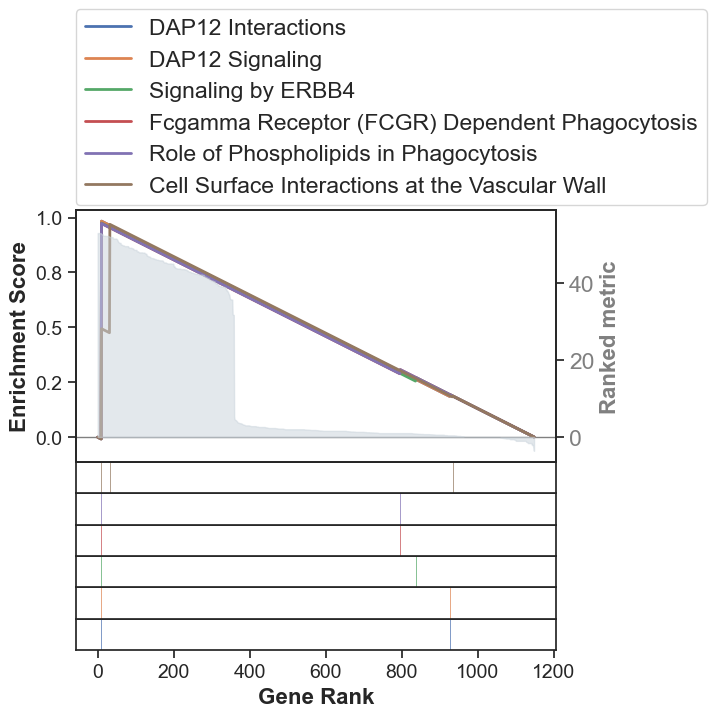

In [131]:
terms = RP_df['Term'].tolist()
axs = pre_res_1.plot(terms=terms[:6],
                   show_ranking=True, # whether to show the second yaxis
                   figsize=(3,4)
                  )


##  'WikiPathways_2024_Human'

In [132]:
for i in ['WikiPathways_2024_Human']:
    pre_res = gp.prerank(rnk=orrnk, # or rnk = rnk,
                         gene_sets=i,
                         threads=4,
                         min_size=2,
                         max_size=5000,
                         permutation_num=1000, # reduce number to speed up testing
                         outdir=i, # don't write to disk
                         seed=6,
                         verbose=True, # see what's going on behind the scenes
                        )

2025-07-20 23:17:02,527 [INFO] Input gene rankings contains duplicated IDs
2025-07-20 23:17:02,534 [WARNING] Duplicated values found in preranked stats: 56.57% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-07-20 23:17:02,535 [INFO] Parsing data files for GSEA.............................
2025-07-20 23:17:02,536 [INFO] Enrichr library gene sets already downloaded in: /home2/zhenglijing/.cache/gseapy, use local file
2025-07-20 23:17:02,581 [INFO] 0718 gene_sets have been filtered out when max_size=5000 and min_size=2
2025-07-20 23:17:02,582 [INFO] 0111 gene_sets used for further statistical testing.....
2025-07-20 23:17:02,583 [INFO] Start to run GSEA...Might take a while..................
2025-07-20 23:17:04,149 [INFO] Start to generate gseapy reports, and produce figures...
2025-07-20 23:17:04,150 [INFO] Congratulations. GSEApy runs successfully................



In [133]:
dfWP = pre_res.res2d
WP_df = dfWP[dfWP['NOM p-val'] < 0.01]

WP_df

Name                                               Term        ES  \
0  prerank  mBDNF And proBDNF Regulation Of GABA Neurotran...  0.987379   
1  prerank                                G13 Signaling WP524  0.987379   
2  prerank              Regulation Of Actin Cytoskeleton WP51  0.987379   

        NES NOM p-val FDR q-val FWER p-val Tag % Gene % Lead_genes  
0  1.312409  0.005908  0.158887      0.229   1/2  0.96%     PIK3CA  
1  1.312409  0.005908  0.158887      0.229   1/2  0.96%     PIK3CA  
2  1.312409  0.005908  0.158887      0.229   1/2  0.96%     PIK3CA

In [134]:
listWP=WP_df['Term'].tolist()

In [135]:
listWP

['mBDNF And proBDNF Regulation Of GABA Neurotransmission WP4829',
 'G13 Signaling WP524',
 'Regulation Of Actin Cytoskeleton WP51']

In [152]:
terms = dfRPWP_df['Term'].tolist()
axs = pre_res.plot(terms=terms[:5],
                   show_ranking=True, # whether to show the second yaxis
                   figsize=(3,4)
                  )


NameError: name 'dfRPWP_df' is not defined

## 作图

In [217]:
targetlist=[ 'Phosphatidylinositol Phosphate Biosynthetic Process (GO:0046854)',
            'Positive Regulation Of I-kappaB kinase/NF-kappaB Signaling (GO:0043123)',
            'Phosphatidylinositol Kinase Activity (GO:0052742)',
            'Cholinergic synapse','Propanoate metabolism',
            'Glyoxylate and dicarboxylate metabolism',
            'Propanoate metabolism','Phosphatidylinositol signaling system',
            'C-type lectin receptor signaling pathway',
            'Toll-like receptor signaling pathway',
            'Neutrophil extracellular trap formation',
            'JAK-STAT signaling pathway',
            'Natural killer cell mediated cytotoxicity',
            'Inositol phosphate metabolism',
            'Genes Changed In Mouse Microglia During Acute Immune Activation PMID26001565',
            'Interferon Gamma Signaling',
            'Interleukin-2 Family Signaling','Fcgamma Receptor (FCGR) Dependent Phagocytosis',
            'Role of Phospholipids in Phagocytosis',
            'mBDNF And proBDNF Regulation Of GABA Neurotransmission WP4829']
len(targetlist)

23

In [218]:
filtered_dfa=filtered_df[filtered_df['Term'].isin(targetlist)]
filtered_dfb=filtered_df2[filtered_df2['Term'].isin(targetlist)]
filtered_dfc=filtered_df3[filtered_df3['Term'].isin(targetlist)]
filtered_dfd=hallmark_df[hallmark_df['Term'].isin(targetlist)]
filtered_dfe=KEGG_df[KEGG_df['Term'].isin(targetlist)]
filtered_dff=HH2021_df[HH2021_df['Term'].isin(targetlist)]
filtered_dfg=CP_df[CP_df['Term'].isin(targetlist)]
filtered_dfh=RP_df[RP_df['Term'].isin(targetlist)]
filtered_dfi=WP_df[WP_df['Term'].isin(targetlist)]

In [219]:
filtered_dfa['db']='GO_BP'
filtered_dfb['db']='GO_CC'
filtered_dfc['db']='GO_MF'
filtered_dfd['db']='Hallmark'
filtered_dfe['db']='KEGG'
filtered_dff['db']='HDSigDB'
filtered_dfg['db']='CCLE'
filtered_dfh['db']='Reactome'
filtered_dfi['db']='WikiPathways'

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: Sett

In [220]:
concatdf=pd.concat([filtered_dfa,filtered_dfb,filtered_dfc,filtered_dfd,filtered_dfe,filtered_dff,filtered_dfg,filtered_dfh,filtered_dfi])

In [221]:
concatdf.head()

Name                                               Term        ES  \
4   prerank  Sulfur Compound Biosynthetic Process (GO:0044272)  0.993025   
13  prerank  Phosphatidylinositol Phosphate Biosynthetic Pr...  0.972659   
14  prerank  Sensory Perception Of Chemical Stimulus (GO:00...  0.962878   
5   prerank  Phosphatidylinositol Kinase Activity (GO:0052742)  0.972659   
3   prerank                         JAK-STAT signaling pathway  0.991282   

         NES NOM p-val FDR q-val FWER p-val Tag % Gene % Lead_genes     db  
4   1.330798  0.006042   0.30002      0.137   1/2  0.78%        DSE  GO_BP  
13  1.286098  0.017804       1.0      0.931   1/2  0.96%     PIK3CA  GO_BP  
14  1.283641  0.033071       1.0      0.947   1/2  1.91%      OR8I2  GO_BP  
5   1.286098  0.017804  0.699227      0.577   1/2  0.96%     PIK3CA  GO_MF  
3   1.314552   0.00292  0.421247      0.446   1/2  0.96%     PIK3CA   KEGG

In [222]:
concatdf['pct']=concatdf['Gene %'].str.replace('%','').astype(float)
concatdf['-log10P']=-np.log10(concatdf['NOM p-val'].astype(float))
concatdf=concatdf.reset_index()
concatdf['NES']=pd.to_numeric(concatdf['NES'], errors='coerce').round(2)
concatdf

index     Name                                               Term  \
0       4  prerank  Sulfur Compound Biosynthetic Process (GO:0044272)   
1      13  prerank  Phosphatidylinositol Phosphate Biosynthetic Pr...   
2      14  prerank  Sensory Perception Of Chemical Stimulus (GO:00...   
3       5  prerank  Phosphatidylinositol Kinase Activity (GO:0052742)   
4       3  prerank                         JAK-STAT signaling pathway   
..    ...      ...                                                ...   
13     44  prerank               Toll-like receptor signaling pathway   
14      7  prerank     Fcgamma Receptor (FCGR) Dependent Phagocytosis   
15      8  prerank              Role of Phospholipids in Phagocytosis   
16     14  prerank                     Interleukin-2 Family Signaling   
17      2  prerank  mBDNF And proBDNF Regulation Of GABA Neurotran...   

          ES   NES NOM p-val FDR q-val FWER p-val Tag % Gene % Lead_genes  \
0   0.993025  1.33  0.006042   0.30002      0.137   1/2  0.78%        DSE   
1   0.972659  1.29  0.017804       1.0      0.931   1/2  0.96%     PIK3CA   
2   0.962878  1.28  0.033071       1.0      0.947   1/2  1.91%      OR8I2   
3   0.972659  1.29  0.017804  0.699227      0.577   1/2  0.96%     PIK3CA   
4   0.991282  1.31   0.00292  0.421247      0.446   1/2  0.96%     PIK3CA   
..       ...   ...       ...       ...        ...   ...    ...        ...   
13  0.938996  1.27  0.040353  0.206384      0.939   1/3  0.96%     PIK3CA   
14  0.972659  1.29  0.016517  0.853609      0.731   1/2  0.96%     PIK3CA   
15  0.972659  1.29  0.016517  0.853609      0.731   1/2  0.96%     PIK3CA   
16  0.954717  1.26  0.043415       1.0      0.929   1/2  0.96%     PIK3CA   
17  0.987379  1.31  0.005908  0.158887      0.229   1/2  0.96%     PIK3CA   

              db   pct   -log10P  
0          GO_BP  0.78  2.218798  
1          GO_BP  0.96  1.749479  
2          GO_BP  1.91  1.480554  
3          GO_MF  0.96  1.749479  
4           KEGG  0.96  2.534661  
..           ...   ...       ...  
13          KEGG  0.96  1.394123  
14      Reactome  0.96  1.782082  
15      Reactome  0.96  1.782082  
16      Reactome  0.96  1.362357  
17  WikiPathways  0.96  2.228529  

[18 rows x 14 columns]

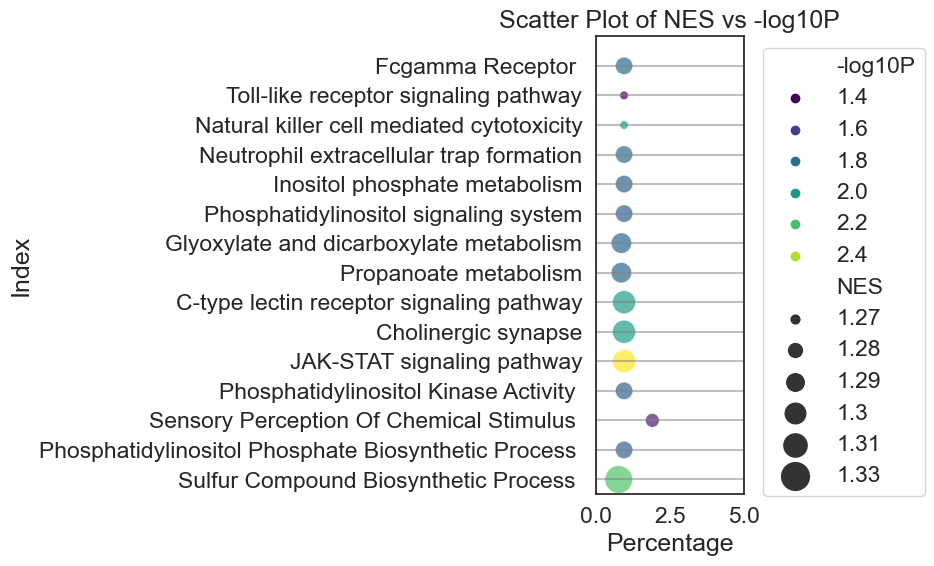

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=concatdf.iloc[:-3],
    x='pct',
    y=concatdf.iloc[:-3].index,
    size='NES',    hue='-log10P',    sizes=(40, 400),    palette='viridis',    alpha=0.7)

plt.yticks(concatdf.iloc[:-3].index,[i.split('(')[0] for i in list(concatdf.iloc[:-3]['Term'])])
plt.title('Scatter Plot of NES vs -log10P')
plt.xlabel('Percentage')
plt.xlim(0,5)
plt.ylabel('Index')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')for i in range(len(concatdf.iloc[:-3])):
    plt.hlines(i,-2,30,color='grey',alpha=.5)
for i in range(0,35,5):
    plt.vlines(i,-2,30,color='grey',alpha=.5)
plt.ylim(0-.5,len(concatdf.iloc[:-3]))
plt.tight_layout()
plt.show()

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


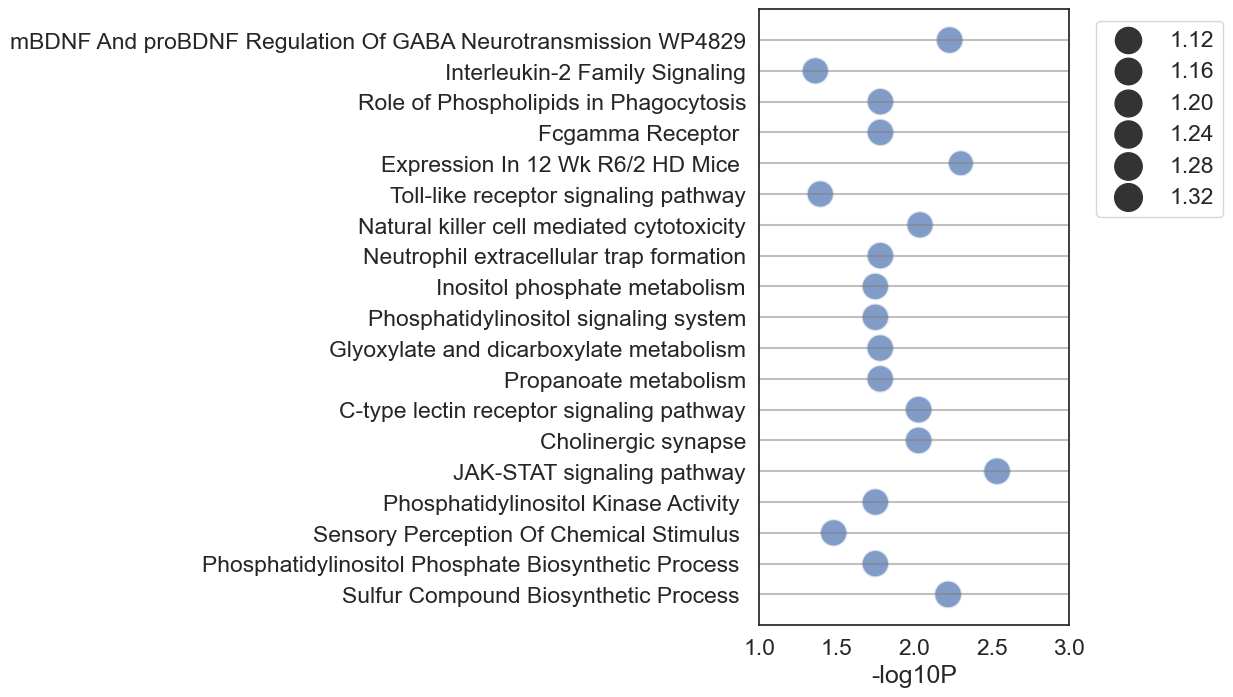

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(4, 8))
scatter = sns.scatterplot(
    data=concatdf,
    x='-log10P',
    y=concatdf.index,
    size='NES',    sizes=(350, 400),    palette='viridis',    alpha=0.7)

plt.yticks(concatdf.index,[i.split('(')[0] for i in list(concatdf['Term'])])
plt.xlabel('-log10P')
plt.xlim(1,3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')for i in range(len(concatdf)):
    plt.hlines(i,-2,30,color='grey',alpha=.5)
for i in range(0,35,5):
    plt.vlines(i,-2,30,color='grey',alpha=.5)
plt.ylim(0-1,len(concatdf))


plt.tight_layout()
plt.show()

In [224]:
concatdf

index     Name                                               Term  \
0       4  prerank  Sulfur Compound Biosynthetic Process (GO:0044272)   
1      13  prerank  Phosphatidylinositol Phosphate Biosynthetic Pr...   
2      14  prerank  Sensory Perception Of Chemical Stimulus (GO:00...   
3       5  prerank  Phosphatidylinositol Kinase Activity (GO:0052742)   
4       3  prerank                         JAK-STAT signaling pathway   
..    ...      ...                                                ...   
13     44  prerank               Toll-like receptor signaling pathway   
14      7  prerank     Fcgamma Receptor (FCGR) Dependent Phagocytosis   
15      8  prerank              Role of Phospholipids in Phagocytosis   
16     14  prerank                     Interleukin-2 Family Signaling   
17      2  prerank  mBDNF And proBDNF Regulation Of GABA Neurotran...   

          ES   NES NOM p-val FDR q-val FWER p-val Tag % Gene % Lead_genes  \
0   0.993025  1.33  0.006042   0.30002      0.137   1/2  0.78%        DSE   
1   0.972659  1.29  0.017804       1.0      0.931   1/2  0.96%     PIK3CA   
2   0.962878  1.28  0.033071       1.0      0.947   1/2  1.91%      OR8I2   
3   0.972659  1.29  0.017804  0.699227      0.577   1/2  0.96%     PIK3CA   
4   0.991282  1.31   0.00292  0.421247      0.446   1/2  0.96%     PIK3CA   
..       ...   ...       ...       ...        ...   ...    ...        ...   
13  0.938996  1.27  0.040353  0.206384      0.939   1/3  0.96%     PIK3CA   
14  0.972659  1.29  0.016517  0.853609      0.731   1/2  0.96%     PIK3CA   
15  0.972659  1.29  0.016517  0.853609      0.731   1/2  0.96%     PIK3CA   
16  0.954717  1.26  0.043415       1.0      0.929   1/2  0.96%     PIK3CA   
17  0.987379  1.31  0.005908  0.158887      0.229   1/2  0.96%     PIK3CA   

              db   pct   -log10P  
0          GO_BP  0.78  2.218798  
1          GO_BP  0.96  1.749479  
2          GO_BP  1.91  1.480554  
3          GO_MF  0.96  1.749479  
4           KEGG  0.96  2.534661  
..           ...   ...       ...  
13          KEGG  0.96  1.394123  
14      Reactome  0.96  1.782082  
15      Reactome  0.96  1.782082  
16      Reactome  0.96  1.362357  
17  WikiPathways  0.96  2.228529  

[18 rows x 14 columns]

In [225]:
[i.split('(')[0] for i in list(concatdf['Term'])]

['Sulfur Compound Biosynthetic Process ',
 'Phosphatidylinositol Phosphate Biosynthetic Process ',
 'Sensory Perception Of Chemical Stimulus ',
 'Phosphatidylinositol Kinase Activity ',
 'JAK-STAT signaling pathway',
 'Cholinergic synapse',
 'C-type lectin receptor signaling pathway',
 'Propanoate metabolism',
 'Glyoxylate and dicarboxylate metabolism',
 'Phosphatidylinositol signaling system',
 'Inositol phosphate metabolism',
 'Neutrophil extracellular trap formation',
 'Natural killer cell mediated cytotoxicity',
 'Toll-like receptor signaling pathway',
 'Fcgamma Receptor ',
 'Role of Phospholipids in Phagocytosis',
 'Interleukin-2 Family Signaling',
 'mBDNF And proBDNF Regulation Of GABA Neurotransmission WP4829']

In [226]:
listyticks=['Sulfur Compound Biosynthetic Process ',
 'Phosphatidylinositol Phosphate\nBiosynthetic Process ',
 'Sensory Perception Of Chemical Stimulus ',
 'Phosphatidylinositol Kinase Activity ',
 'JAK-STAT signaling pathway',
 'Cholinergic synapse',
 'C-type lectin receptor signaling pathway',
 'Propanoate metabolism',
 'Glyoxylate and dicarboxylate metabolism',
 'Phosphatidylinositol signaling system',
 'Inositol phosphate metabolism',
 'Neutrophil extracellular trap formation',
 'Natural killer cell mediated cytotoxicity',
 'Toll-like receptor signaling pathway',
 'Fcgamma Receptor ',
 'Role of Phospholipids in Phagocytosis',
 'Interleukin-2 Family Signaling',
 'mBDNF And proBDNF Regulation Of\n GABA Neurotransmission WP4829']

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


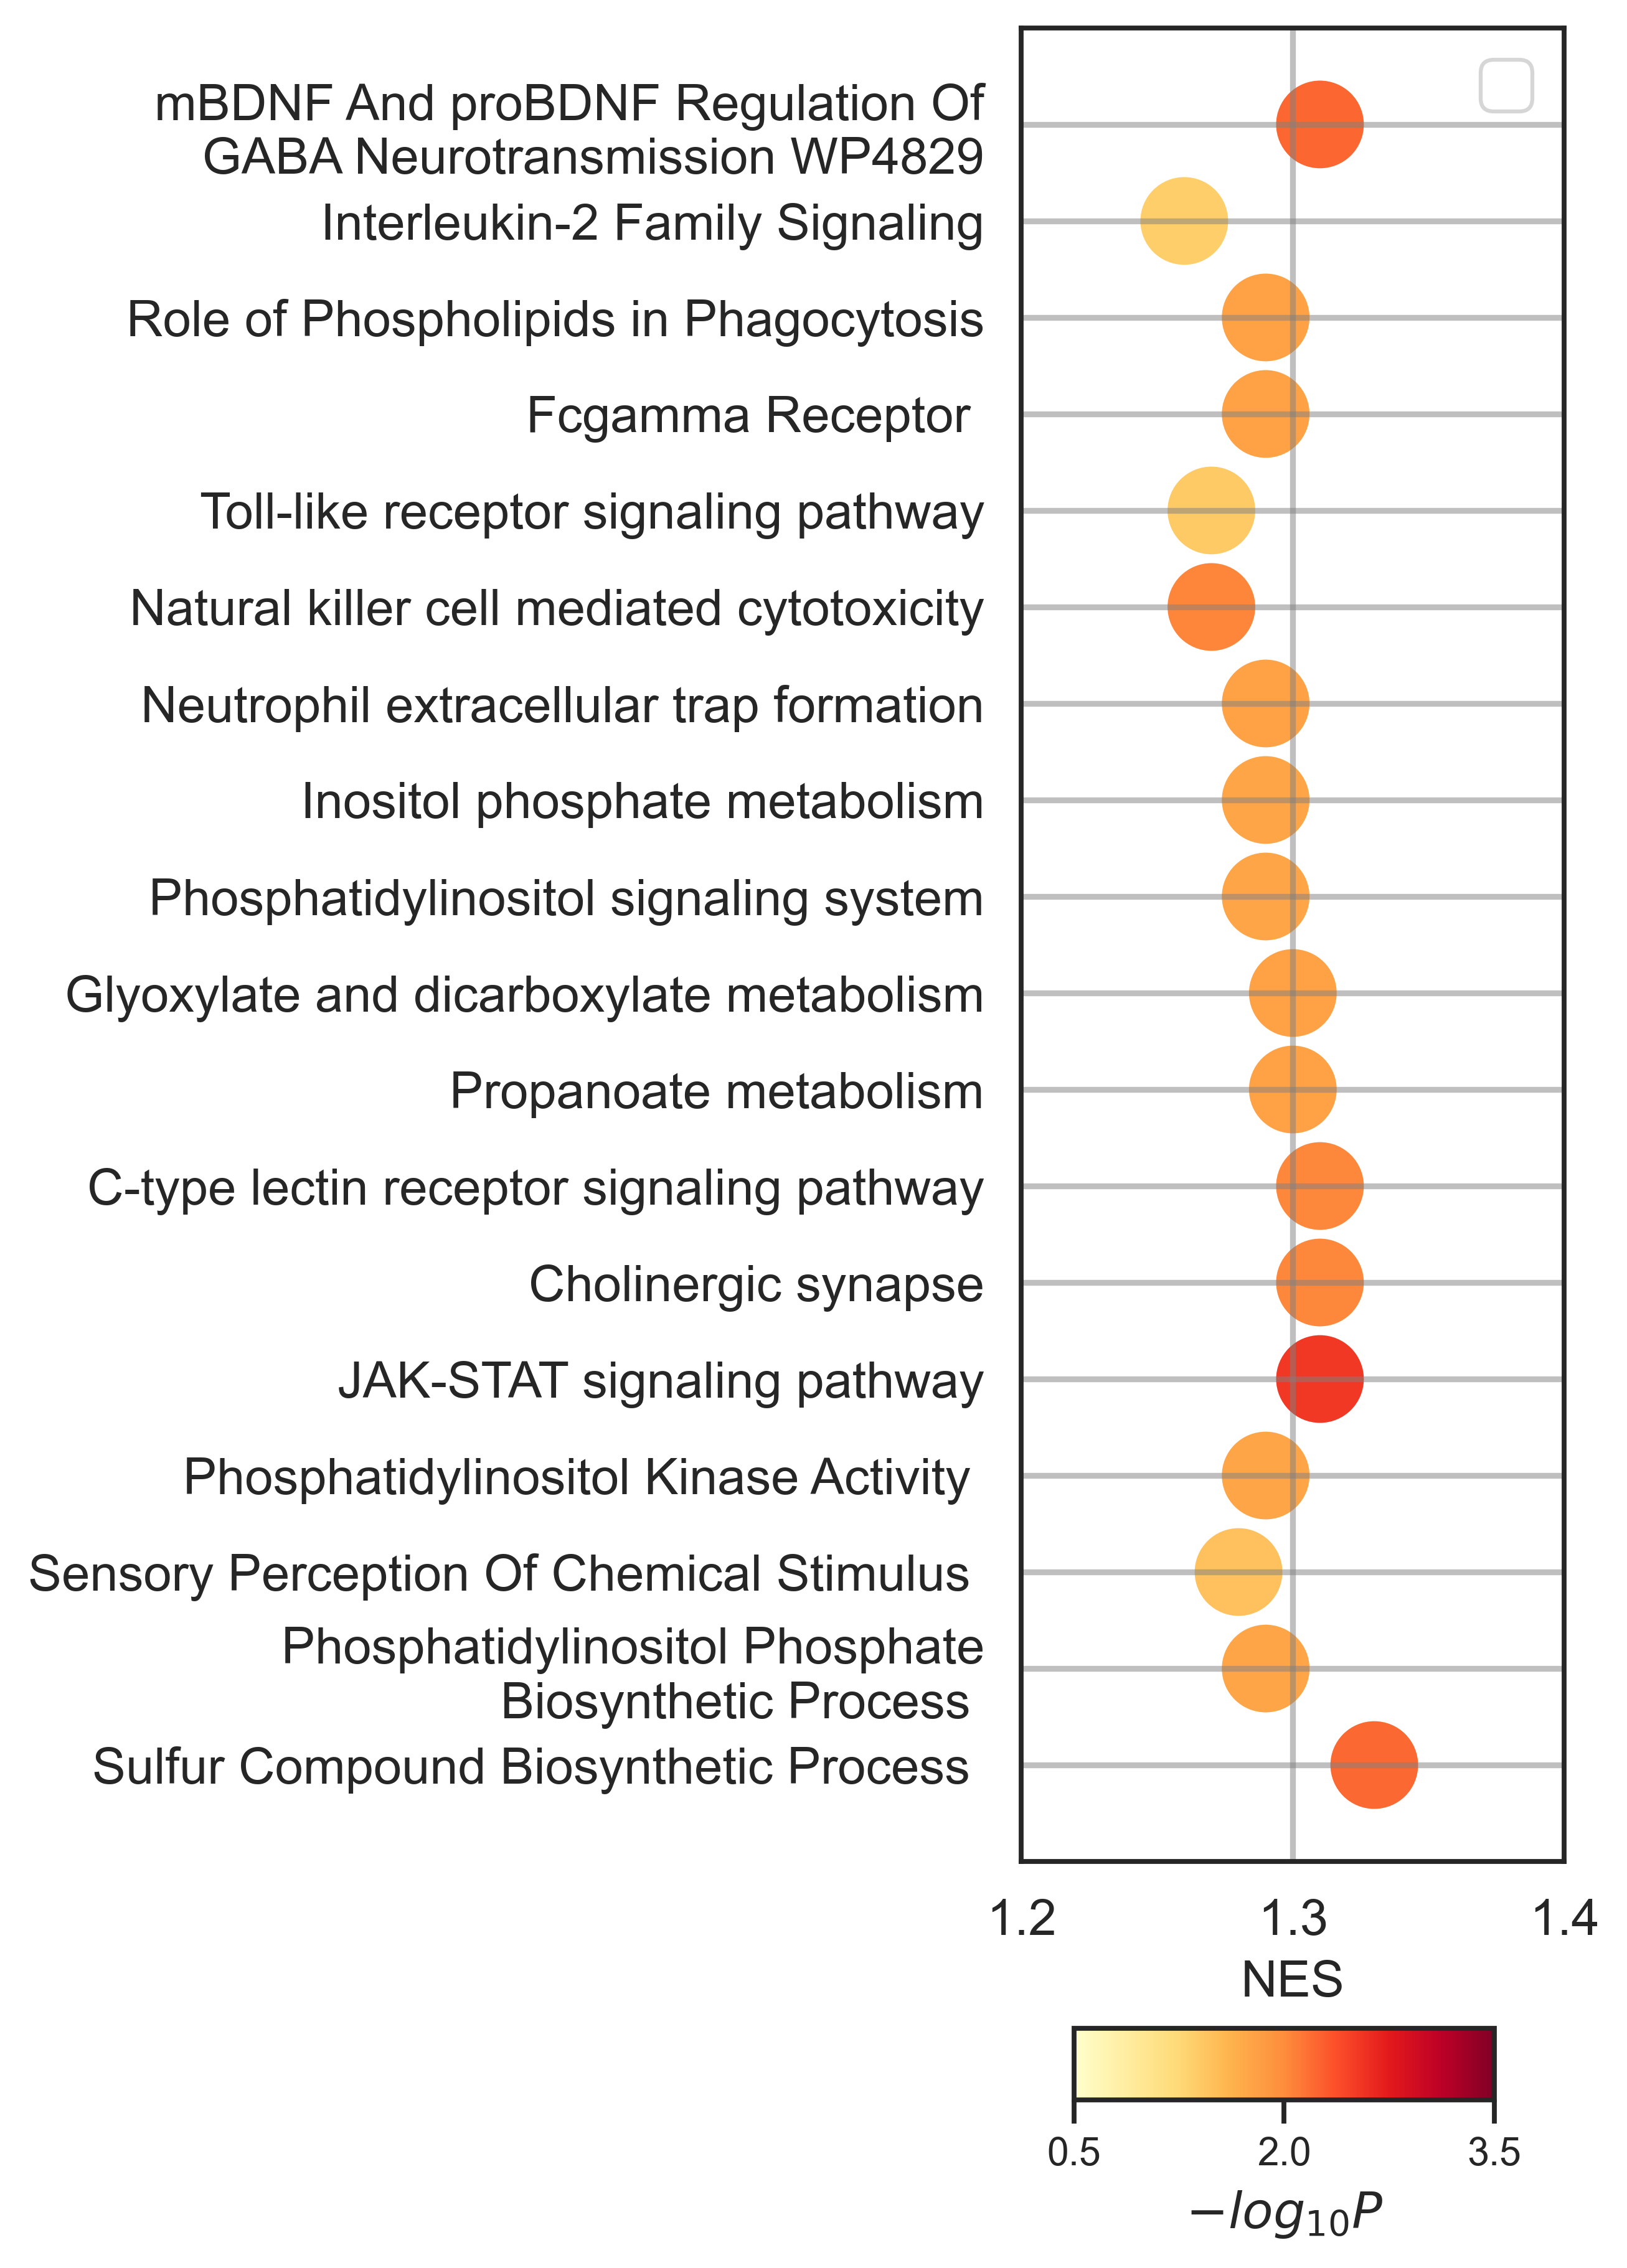

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(2.5, 8.5),dpi=450)
scatter = sns.scatterplot(
    data=concatdf,
    x='NES',
    y=concatdf.index,
    size=400,    hue='-log10P',    sizes=(600, 700),    palette='YlOrRd',    alpha=1       ,hue_norm=(0.5, 3.5),
    legend=False,
)

plt.yticks(concatdf.index,listyticks,fontsize=13)
plt.xlabel('NES',fontsize=13)
plt.xlim(1.2,1.4)
plt.legend('')for i in range(len(concatdf)):
    plt.hlines(i,-2,30,color='grey',alpha=.5)
for i in np.arange(0,4,0.13):
    plt.vlines(i,-2,30,color='grey',alpha=.5)
plt.ylim(0-1,len(concatdf))
norm = Normalize(vmin=0.5, vmax=3.5)
sm = ScalarMappable(norm=norm, cmap='YlOrRd')
sm.set_array([])ticks = [.5,2,3.5,]
plt.xticks(fontsize=13)

cbar_ax = plt.axes([0.2, 0.01, 0.6, 0.03])  # [left, bottom, width, height]

cbar = plt.colorbar(
    sm, 
    cax=cbar_ax,
    ax=scatter.axes, 
    label=r"$-log_{10}P$",    pad=0.1,    shrink=0.3,    aspect=20,    orientation='horizontal',
)
cbar.set_label(r"$-log_{10}P$", size=13)
cbar.ax.tick_params(labelsize=10)cbar.set_ticks(ticks)
plt.tight_layout()
plt.show()

In [439]:
targetlist

['Sensory Perception Of Chemical Stimulus (GO:0007606)',
 'Short-Chain Fatty Acid Metabolic Process (GO:0046459)',
 'Sulfur Compound Biosynthetic Process (GO:0044272)',
 'Phosphatidylinositol Phosphate Biosynthetic Process (GO:0046854)',
 'Positive Regulation Of I-kappaB kinase/NF-kappaB Signaling (GO:0043123)',
 'Phosphatidylinositol Kinase Activity (GO:0052742)',
 'Cholinergic synapse',
 'Propanoate metabolism',
 'Glyoxylate and dicarboxylate metabolism',
 'Propanoate metabolism',
 'Phosphatidylinositol signaling system',
 'C-type lectin receptor signaling pathway',
 'Toll-like receptor signaling pathway',
 'Neutrophil extracellular trap formation',
 'JAK-STAT signaling pathway',
 'Natural killer cell mediated cytotoxicity',
 'Inositol phosphate metabolism',
 'Expression In 12 Wk R6/2 HD Mice (Set2) GSE9804',
 'Genes Changed In Mouse Microglia During Acute Immune Activation PMID26001565',
 'Interferon Gamma Signaling',
 'Interleukin-2 Family Signaling',
 'Fcgamma Receptor (FCGR) Depe

In [441]:
[i for i in targetlist if i not in list(concatdf['Term'])]

['mBDNF And proBDNF Regulation Of GABA Neurotransmission (WP4829)']

In [442]:
len(targetlist)

24

In [443]:
len(set(targetlist))

23

# significant_chip

## VAF >10%

In [61]:
def read_txt_to_dict(file_path):
    result_dict = {}
    with open(file_path, 'r') as file:
        for line in file:
            elements = line.strip().split('\t')

            if len(elements) >= 2:
                key = elements[0]
                values = [elem for elem in elements[1:] if elem]
                result_dict[key] = values
    return result_dict

In [62]:
GO_CC_23=read_txt_to_dict('/home2/zhenglijing/work/GO/GO_Cellular_Component_2023.txt')
GO_BP_23=read_txt_to_dict('/home2/zhenglijing/work/GO/GO_Biological_Process_2023.txt')
GO_MF_23=read_txt_to_dict('/home2/zhenglijing/work/GO/GO_Molecular_Function_2023.txt')

In [63]:
OR=pd.read_csv('/home2/zhenglijing/work/SNP_bcf/dele_AD/resultR.csv',index_col=0)

In [64]:
OR

geneloci        OR
0              chr1-143743325-143743325-C-A-LINC01138  1.466300
1   chr14-19807178-19807178-C-T-LINC01297-DUXAP10-...  1.561714
2              chr14-19807178-19807178-C-T-LNCRNA-ATB  1.561714
3                 chr1-664468-664468-G-T-LOC100133331  1.399738
4                   chr2-85570186-85570186-G-A-RETSAT  1.375622
..                                                ...       ...
27                   chr2-87866525-87866525-G-A-CYTOR  1.486575
28               chr2-87866525-87866525-G-A-MIR4435-1  1.486575
29                  chr6-26866905-26866905-G-C-GUSBP2  1.596092
30                 chr4-122997316-122997316-C-T-TRPC3  1.649422
31              chr4-122997316-122997316-C-T-KIAA1109  1.649422

[32 rows x 2 columns]

In [66]:
OR['gene']=OR['geneloci'].str.split('-',expand=True)[5]

In [67]:
OR['logOR']=np.log2(OR['OR'])

In [68]:
orrnk=OR[['gene','logOR']].set_index('gene')

In [69]:
orrnk

logOR
gene                  
LINC01138     0.552181
LINC01297     0.643130
LNCRNA        0.643130
LOC100133331  0.485157
RETSAT        0.460084
...                ...
CYTOR         0.571992
MIR4435       0.571992
GUSBP2        0.674543
TRPC3         0.721961
KIAA1109      0.721961

[32 rows x 1 columns]

### CC

In [70]:
pre_res = gp.prerank(rnk=orrnk, # or rnk = rnk,
                     gene_sets=GO_CC_23,
                     threads=4,
                     min_size=2,
                     max_size=5000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )

2025-03-09 22:56:37,835 [INFO] Input gene rankings contains duplicated IDs
2025-03-09 22:56:37,842 [WARNING] Duplicated values found in preranked stats: 25.00% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-09 22:56:37,844 [INFO] Parsing data files for GSEA.............................
2025-03-09 22:56:37,851 [INFO] 0472 gene_sets have been filtered out when max_size=5000 and min_size=2
2025-03-09 22:56:37,852 [INFO] 0002 gene_sets used for further statistical testing.....
2025-03-09 22:56:37,853 [INFO] Start to run GSEA...Might take a while..................
2025-03-09 22:56:37,862 [INFO] Congratulations. GSEApy runs successfully................



In [71]:
pre_res.res2d.head(15)

Name                                               Term        ES  \
0  prerank  Intracellular Membrane-Bounded Organelle (GO:0...  0.456815   
1  prerank                               Nucleus (GO:0005634)  0.456815   

        NES NOM p-val FDR q-val FWER p-val Tag % Gene % Lead_genes  
0  0.923781  0.574103  0.574103      0.368   1/3  9.38%      KMT2C  
1  0.923781  0.574103  0.574103      0.368   1/3  9.38%      KMT2C

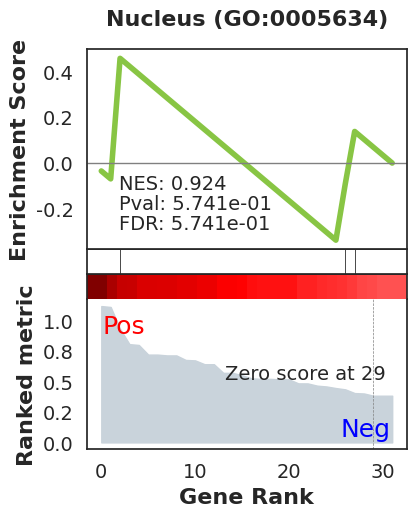

In [72]:
terms = pre_res.res2d.Term
axs = pre_res.plot(terms=terms[1]) # v1.0.5

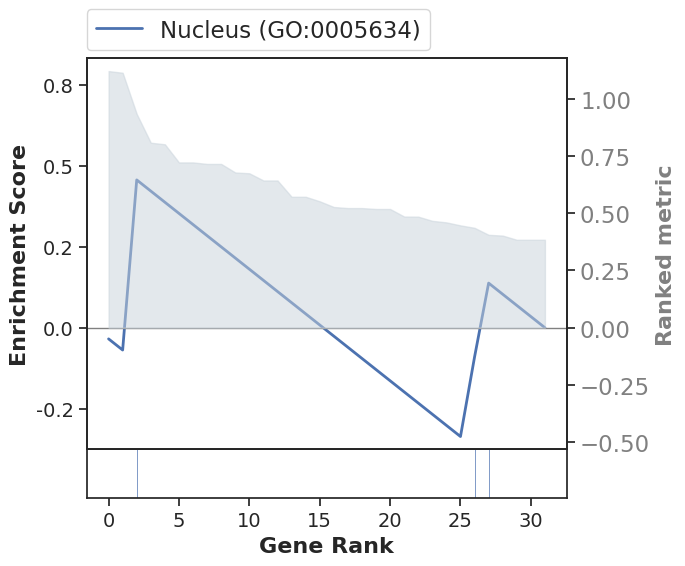

In [73]:
axs = pre_res.plot(terms=terms[1:5],
                   show_ranking=True, # whether to show the second yaxis
                   figsize=(3,4)
                  )


### MF 

In [75]:
orrnk

logOR
gene                  
LINC01138     0.552181
LINC01297     0.643130
LNCRNA        0.643130
LOC100133331  0.485157
RETSAT        0.460084
...                ...
CYTOR         0.571992
MIR4435       0.571992
GUSBP2        0.674543
TRPC3         0.721961
KIAA1109      0.721961

[32 rows x 1 columns]

In [76]:
pre_res = gp.prerank(rnk=orrnk, # or rnk = rnk,
                     gene_sets=GO_MF_23,
                     threads=4,
                     min_size=2,
                     max_size=5000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )

2025-03-09 22:59:57,490 [INFO] Input gene rankings contains duplicated IDs
2025-03-09 22:59:57,498 [WARNING] Duplicated values found in preranked stats: 25.00% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-09 22:59:57,498 [INFO] Parsing data files for GSEA.............................
2025-03-09 22:59:57,508 [INFO] 1146 gene_sets have been filtered out when max_size=5000 and min_size=2
2025-03-09 22:59:57,509 [INFO] 0001 gene_sets used for further statistical testing.....
2025-03-09 22:59:57,510 [INFO] Start to run GSEA...Might take a while..................
2025-03-09 22:59:57,524 [INFO] Congratulations. GSEApy runs successfully................



In [77]:
pre_res.res2d.head(15)

Name                      Term        ES       NES NOM p-val FDR q-val  \
0  prerank  RNA Binding (GO:0003723)  0.630402  1.090576  0.397611  0.397611   

  FWER p-val Tag % Gene % Lead_genes  
0      0.233   1/2  9.38%      KMT2C

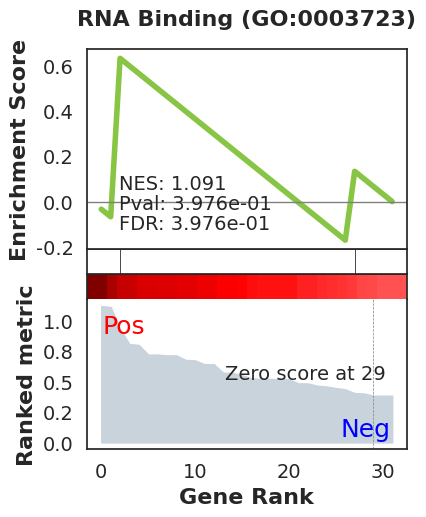

In [79]:
terms = pre_res.res2d.Term
axs = pre_res.plot(terms=terms[0]) # v1.0.5

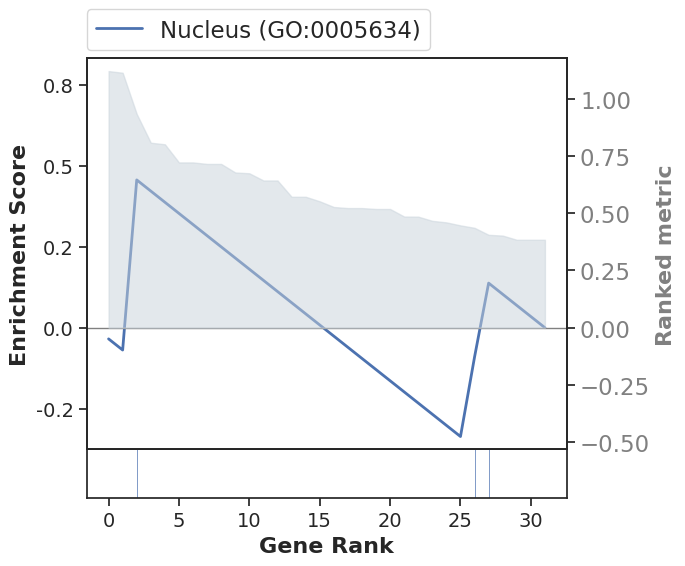

In [73]:
axs = pre_res.plot(terms=terms[1:5],
                   show_ranking=True, # whether to show the second yaxis
                   figsize=(3,4)
                  )


In [3]:
gp.get_library_name(organism='human')

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DGIdb_Drug_Targets_2024',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_CRISPR_GeneDependency_CellLines_2023',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_Cell

In [4]:
'CCLE_Proteomics_2020','GTEx_Tissue_Expression_Down',
 'GTEx_Tissue_Expression_Up','HDSigDB_Human_2021', 'KEGG_2021_Human','MSigDB_Hallmark_2020','Reactome_Pathways_2024','WikiPathways_2024_Human'

IndentationError: unexpected indent (1897371500.py, line 2)

In [5]:
for i in ['CCLE_Proteomics_2020','GTEx_Tissue_Expression_Down',
 'GTEx_Tissue_Expression_Up','HDSigDB_Human_2021', 'KEGG_2021_Human',
          'cMSigDB_Hallmark_2020','Reactome_Pathways_2024','WikiPathways_2024_Human'][2:]:

    pre_res = gp.prerank(rnk=orrnk, # or rnk = rnk,
                         gene_sets=i,
                         threads=4,
                         min_size=2,
                         max_size=5000,
                         permutation_num=1000, # reduce number to speed up testing
                         outdir=i, # don't write to disk
                         seed=6,
                         verbose=True, # see what's going on behind the scenes
                        )

NameError: name 'orrnk' is not defined

In [67]:
orrnk

logOR
gene                  
DDX11L1      -0.193557
LOC102725121 -0.193557
CDK11B       -0.145877
CLCNKA       -0.181153
CLCNKB       -0.181153
...                ...
MUC20         0.072327
TRY2P         0.079743
MIR11400      0.079743
LINC02297     0.048784
POTEG         0.048784

[3852 rows x 1 columns]